        #import libraries

In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#actual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [3]:
#read application csv
app_data = pd.read_csv("application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
#data inspection
###get info and shape
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(62), int64(44), object(16)
memory usage: 4.7+ MB


In [5]:
##data quality check
##% of null value
pd.set_option("display.max_rows", 200)
app_data.isnull().mean() *100


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.019814
NAME_TYPE_SUITE                  0.396275
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.177927
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#conclusion columns with null values more then 47% may give wrong insights we drop them

droping columns with missing values more then 47%

In [6]:
percentage = 47
threshold = int(((100-percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1, thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [7]:
app_df.shape

(5047, 74)

In [8]:
app_df.isnull().mean() *100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.019814
NAME_TYPE_SUITE                 0.396275
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

##impute the missing values
## check miss values before importing

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   5047 non-null   int64  
 1   TARGET                       5047 non-null   int64  
 2   NAME_CONTRACT_TYPE           5047 non-null   object 
 3   CODE_GENDER                  5047 non-null   object 
 4   FLAG_OWN_CAR                 5047 non-null   object 
 5   FLAG_OWN_REALTY              5047 non-null   object 
 6   CNT_CHILDREN                 5047 non-null   int64  
 7   AMT_INCOME_TOTAL             5047 non-null   float64
 8   AMT_CREDIT                   5047 non-null   float64
 9   AMT_ANNUITY                  5047 non-null   float64
 10  AMT_GOODS_PRICE              5046 non-null   float64
 11  NAME_TYPE_SUITE              5027 non-null   object 
 12  NAME_INCOME_TYPE             5047 non-null   object 
 13  NAME_EDUCATION_TYP

In [10]:
##0cution type column has 31% missing values .since it is a catagorical column,imputing the missing values with a unknown 
## or other value 


In [11]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

30.968892411333464

In [12]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 24.799082
Sales staff              16.016073
Core staff               13.662457
Drivers                   9.184845
Managers                  8.955224
High skill tech staff     5.396096
Accountants               4.850746
Medicine staff            4.190586
Security staff            3.214696
Cooking staff             2.927669
Cleaning staff            1.923077
Private service staff     1.291619
Low-skill Laborers        1.262916
Secretaries               0.832377
Waiters/barmen staff      0.545350
Realty agents             0.430540
HR staff                  0.344432
IT staff                  0.172216
Name: proportion, dtype: float64

In [13]:
app_df.OCCUPATION_TYPE.fillna("others",inplace=True)

In [14]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [15]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
others                   30.968892
Laborers                 17.119081
Sales staff              11.056073
Core staff                9.431345
Drivers                   6.340400
Managers                  6.181890
High skill tech staff     3.724985
Accountants               3.348524
Medicine staff            2.892808
Security staff            2.219140
Cooking staff             2.021003
Cleaning staff            1.327521
Private service staff     0.891619
Low-skill Laborers        0.871805
Secretaries               0.574599
Waiters/barmen staff      0.376461
Realty agents             0.297206
HR staff                  0.237765
IT staff                  0.118883
Name: proportion, dtype: float64

##  EXT_SOURCE_3 column has 19 % missing values

In [16]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.4967307311274

In [17]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.694093    0.738371
0.673830    0.615309
0.665855    0.541472
0.746300    0.541472
0.684828    0.541472
              ...   
0.117614    0.024612
0.068251    0.024612
0.861653    0.024612
0.127699    0.024612
0.088461    0.024612
Name: proportion, Length: 582, dtype: float64

In [18]:
app_df.EXT_SOURCE_3.describe()

count    4063.000000
mean        0.510648
std         0.197266
min         0.000527
25%         0.372334
50%         0.529890
75%         0.672243
max         0.882530
Name: EXT_SOURCE_3, dtype: float64

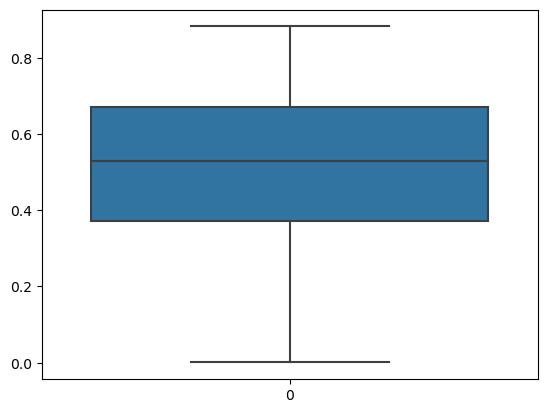

In [19]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

conclusion since a numerical columns with no outliers and there is not much
#difference between mean and median hence we can impute with mean and median

In [20]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)

In [21]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [22]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.529890    19.714682
0.694093     0.594413
0.673830     0.495344
0.524496     0.435903
0.684828     0.435903
              ...    
0.117614     0.019814
0.068251     0.019814
0.861653     0.019814
0.127699     0.019814
0.088461     0.019814
Name: proportion, Length: 582, dtype: float64

In [23]:
null_cols = list(app_df.columns[app_df.isnull().any()])
len(null_cols)

14

In [24]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.019814
NAME_TYPE_SUITE                 0.396275
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### handling missing values in columns with 13% null values

In [25]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR .value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.152542
1.0     0.824553
2.0     0.022904
Name: proportion, dtype: float64

In [26]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY .value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.381585
1.0     0.526798
4.0     0.045809
3.0     0.022904
2.0     0.022904
Name: proportion, dtype: float64

#conclusion we could see 99% of values in the columns AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_qtr,AMT_REQ_CREDIT_BUREAU_mon, AMT_REQ_CREDIT_BUREAU_week,
#AMT_REQ_CREDIT_BUREAU_day,AMT_REQ_CREDIT_BUREAU_hour is actually 0.0 hence impute these columns with the mode 

In [27]:
cols = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [28]:
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace=True)

In [29]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.019814
NAME_TYPE_SUITE                 0.396275
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [30]:
app_df.EMERGENCYSTATE_MODE .isnull().mean()*100

46.483059243114724

In [31]:
app_df.EMERGENCYSTATE_MODE.value_counts(normalize=True)*100

EMERGENCYSTATE_MODE
No     98.55609
Yes     1.44391
Name: proportion, dtype: float64

In [32]:
app_df.EMERGENCYSTATE_MODE.fillna("others",inplace=True)

In [33]:
app_df.EMERGENCYSTATE_MODE.isnull().mean()*100

0.0

In [34]:
app_df.EMERGENCYSTATE_MODE.value_counts(normalize=True)*100

EMERGENCYSTATE_MODE
No        52.744204
others    46.483059
Yes        0.772736
Name: proportion, dtype: float64

In [35]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.019814
NAME_TYPE_SUITE                0.396275
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


##handling missing values less then 0ne %

In [36]:
null_cols = list(app_df. columns[app_df.isna().any()])
len(null_cols)

7

In [37]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.201512
Family             13.208673
Spouse, partner     3.640342
Children            0.974736
Other_B             0.616670
Other_A             0.238711
Group of people     0.119355
Name: proportion, dtype: float64

In [38]:
app_df.EXT_SOURCE_2 .value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.417412
0.162145    0.159014
0.159679    0.139137
0.262258    0.119261
0.265312    0.119261
              ...   
0.187286    0.019877
0.451976    0.019877
0.162094    0.019877
0.452962    0.019877
0.252900    0.019877
Name: proportion, Length: 4822, dtype: float64

In [39]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0     54.140127
1.0     15.366242
2.0      9.195860
3.0      6.707803
4.0      4.996019
5.0      3.224522
6.0      2.448248
7.0      1.234076
8.0      0.796178
9.0      0.776274
10.0     0.417994
11.0     0.298567
12.0     0.139331
13.0     0.099522
14.0     0.079618
22.0     0.039809
16.0     0.019904
15.0     0.019904
Name: proportion, dtype: float64

#conclusion catagorical columns impute missing values with mode 
#for  numerical columns missing values with mediom

In [40]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [41]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0], inplace=True)

#imputing numerical columns

In [42]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE .median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE .fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE .median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [43]:
null_cols = list(app_df. columns[app_df.isna().any()])
len(null_cols)

0

In [44]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

## convert negative values to positive in days variable to that median

In [45]:
app_df.DAYS_BIRTH = app_df. DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df. DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df. DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df. DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df. DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))


#binning of continuous variables
#standardazing days column in year for easy binning

In [46]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

##BINNING OF AMOUNT CREDIT COLUMN 

In [47]:
app_df.AMT_CREDIT.value_counts(normalize = True)*100


AMT_CREDIT
450000.0     2.991876
225000.0     2.872994
675000.0     2.773925
180000.0     2.655043
270000.0     2.199326
               ...   
2160000.0    0.019814
256500.0     0.019814
614223.0     0.019814
404325.0     0.019814
609898.5     0.019814
Name: proportion, Length: 1297, dtype: float64

In [48]:
app_df.AMT_CREDIT.describe()

count    5.047000e+03
mean     5.967164e+05
std      4.005947e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [49]:
app_df["AMT_CREDIT_category"] = pd.cut(
    app_df.AMT_CREDIT,
    [0, 200000, 400000, 600000, 800000, 10000000],
    labels=["very low credit", "low credit", "medium credit", "high credit", "very high credit"]
)


In [50]:
app_df.AMT_CREDIT_category.value_counts(normalize = True)*100

AMT_CREDIT_category
very high credit    26.035268
low credit          25.856945
medium credit       21.497920
high credit         14.325342
very low credit     12.284525
Name: proportion, dtype: float64

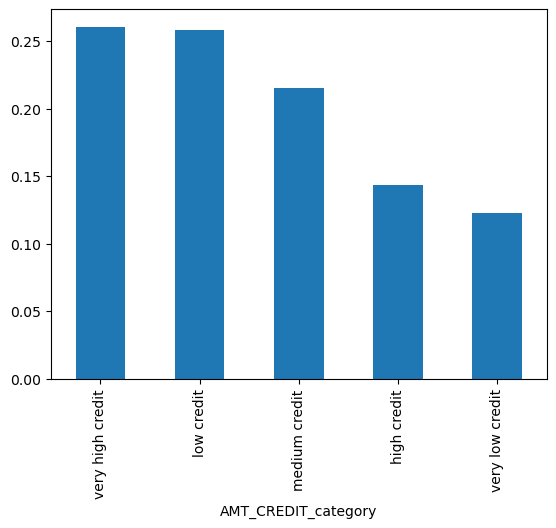

In [51]:
app_df["AMT_CREDIT_category"].value_counts(normalize =True).plot.bar()
plt.show()

- conclusion : the credit amount of the lone for amount low (2L to 4L) or very high(above8L)

## binning of years birth column

In [52]:
app_df['AGE_category'] = pd.cut(
app_df.YEARS_BIRTH,[0,25, 45, 65, 85], 
    labels = ["below 25", "25-45", "45-65", "65-85"])

In [53]:
app_df.AGE_category.value_counts(normalize = True)*100

AGE_category
25-45       49.811769
45-65       42.341985
below 25     4.576976
65-85        3.269269
Name: proportion, dtype: float64

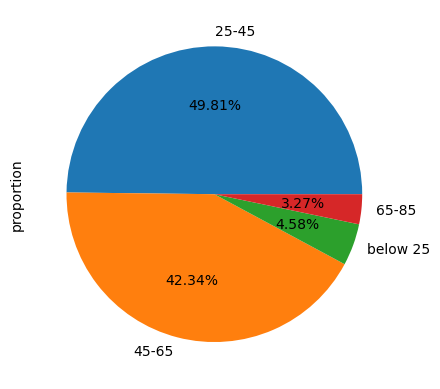

In [54]:
app_df["AGE_category"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.show()

- conclusion most of the applicants are between 25-45 agr group

## data imbalance check

In [55]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## dividing the application dataset with target variables as 0 and 1

In [56]:
tar_0 = app_df[app_df.TARGET ==0]
tar_1 = app_df[app_df.TARGET ==1]

In [57]:
app_df.TARGET.value_counts(normalize = True)*100

TARGET
0    92.272637
1     7.727363
Name: proportion, dtype: float64

### CONCLUSION  1out of 9 or 10 applicants  are defaultes

univariate analysis

In [58]:
cat_cols = list(app_df.columns[app_df.dtypes == object])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])

In [59]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [60]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',

NAME_CONTRACT_TYPE
Cash loans         0.903111
Revolving loans    0.096889
Name: proportion, dtype: float64


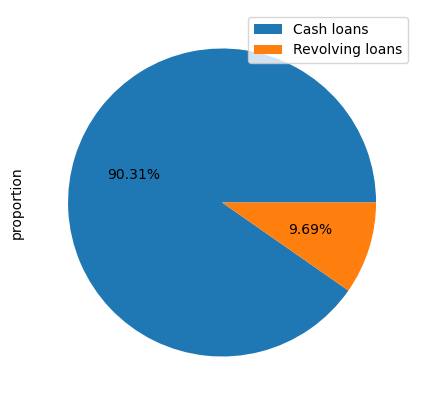

CODE_GENDER
F    0.659996
M    0.340004
Name: proportion, dtype: float64


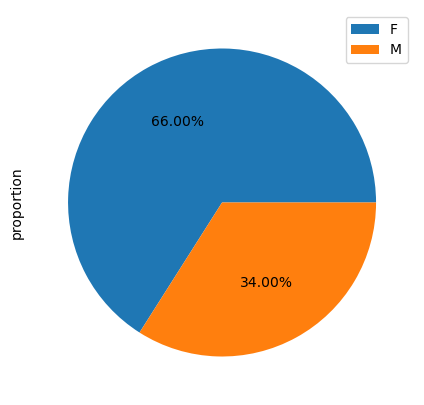

FLAG_OWN_CAR
N    0.661779
Y    0.338221
Name: proportion, dtype: float64


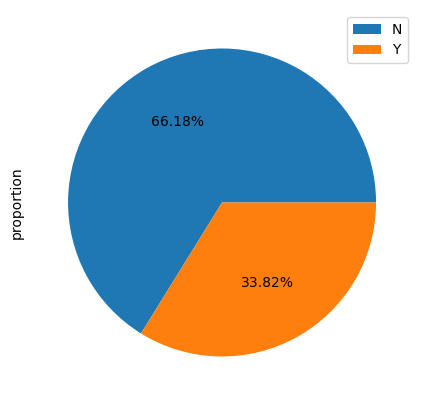

FLAG_OWN_REALTY
Y    0.700218
N    0.299782
Name: proportion, dtype: float64


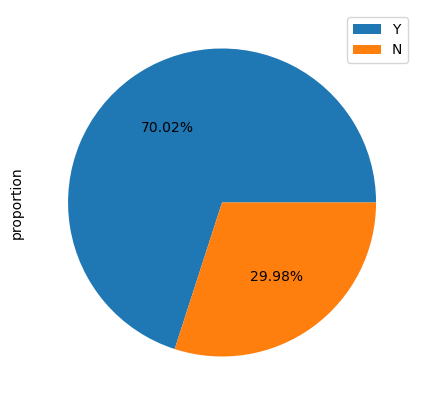

NAME_TYPE_SUITE
Unaccompanied      0.812760
Family             0.131563
Spouse, partner    0.036259
Children           0.009709
Other_B            0.006142
Other_A            0.002378
Group of people    0.001189
Name: proportion, dtype: float64


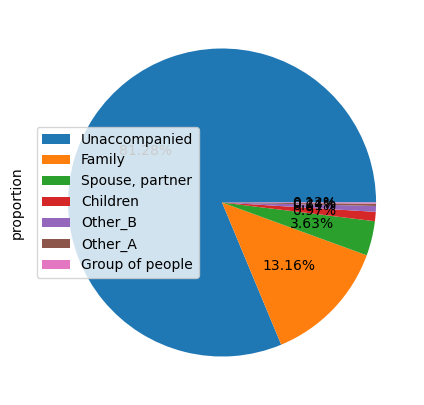

NAME_INCOME_TYPE
Working                 0.521696
Commercial associate    0.234199
Pensioner               0.180701
State servant           0.063008
Unemployed              0.000396
Name: proportion, dtype: float64


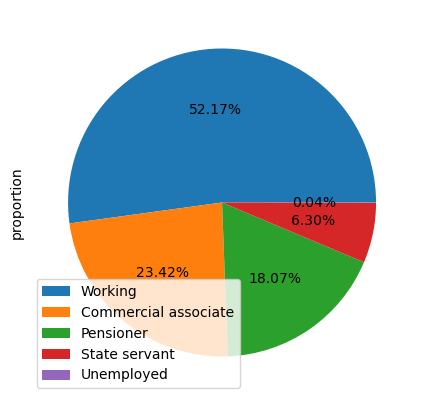

NAME_EDUCATION_TYPE
Secondary / secondary special    0.714880
Higher education                 0.239548
Incomplete higher                0.033089
Lower secondary                  0.011492
Academic degree                  0.000991
Name: proportion, dtype: float64


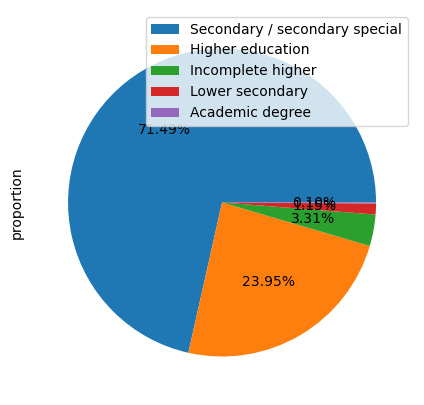

NAME_FAMILY_STATUS
Married                 0.637408
Single / not married    0.147811
Civil marriage          0.092926
Separated               0.063800
Widow                   0.058054
Name: proportion, dtype: float64


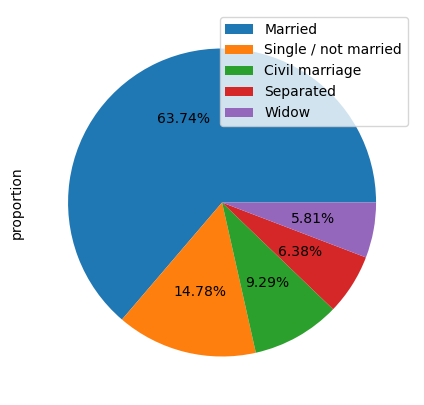

NAME_HOUSING_TYPE
House / apartment      0.886863
With parents           0.045968
Municipal apartment    0.038042
Rented apartment       0.017040
Office apartment       0.007727
Co-op apartment        0.004359
Name: proportion, dtype: float64


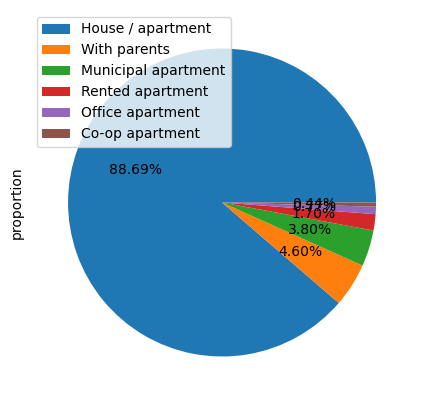

OCCUPATION_TYPE
others                   0.309689
Laborers                 0.171191
Sales staff              0.110561
Core staff               0.094313
Drivers                  0.063404
Managers                 0.061819
High skill tech staff    0.037250
Accountants              0.033485
Medicine staff           0.028928
Security staff           0.022191
Cooking staff            0.020210
Cleaning staff           0.013275
Private service staff    0.008916
Low-skill Laborers       0.008718
Secretaries              0.005746
Waiters/barmen staff     0.003765
Realty agents            0.002972
HR staff                 0.002378
IT staff                 0.001189
Name: proportion, dtype: float64


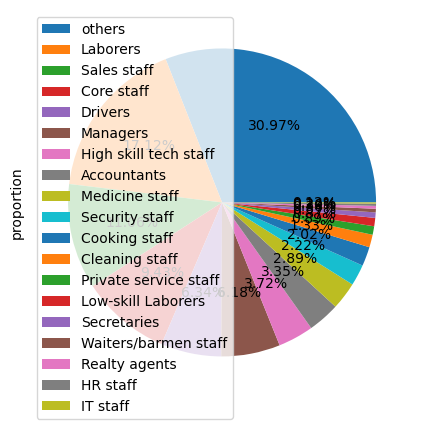

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175352
THURSDAY     0.166634
WEDNESDAY    0.166237
MONDAY       0.164058
FRIDAY       0.163265
SATURDAY     0.110561
SUNDAY       0.053893
Name: proportion, dtype: float64


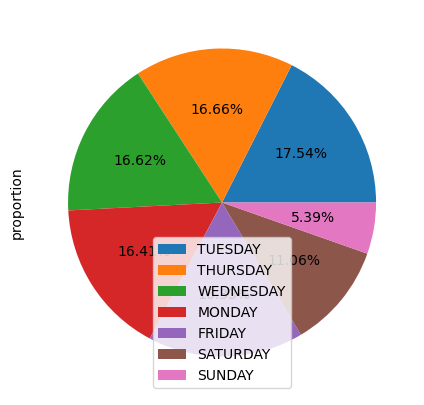

ORGANIZATION_TYPE
Business Entity Type 3    0.223301
XNA                       0.181098
Self-employed             0.131761
Other                     0.056865
Medicine                  0.036655
Government                0.033683
Business Entity Type 2    0.030711
School                    0.025560
Kindergarten              0.021993
Trade: type 7             0.021399
Construction              0.019021
Transport: type 4         0.016842
Business Entity Type 1    0.015653
Housing                   0.011690
Industry: type 3          0.011492
Trade: type 3             0.011492
Industry: type 11         0.010501
Industry: type 9          0.010303
Transport: type 2         0.009907
Security                  0.008916
Services                  0.008322
Bank                      0.007926
Military                  0.007529
Agriculture               0.007331
Postal                    0.007133
Police                    0.006340
Security Ministries       0.006340
Trade: type 2             0.005548
Tr

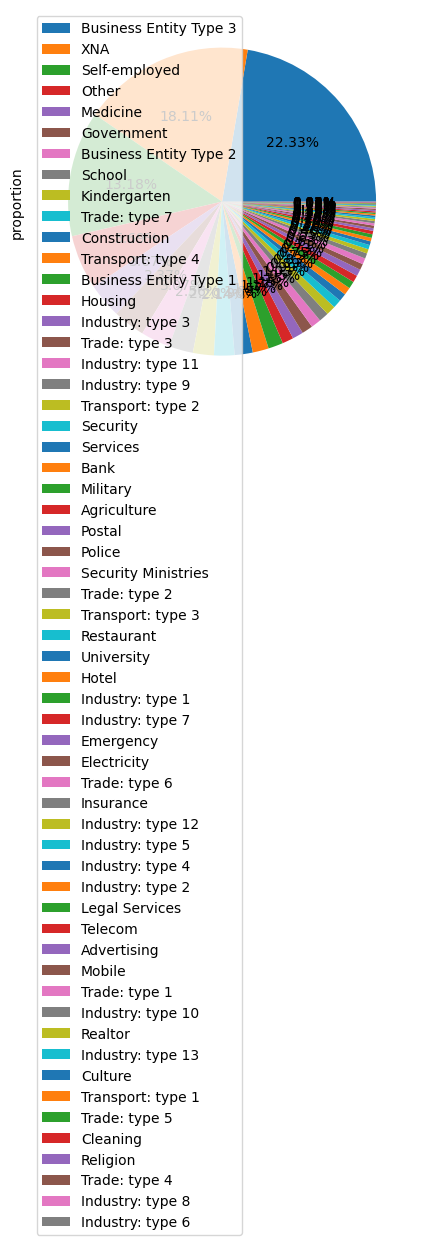

EMERGENCYSTATE_MODE
No        0.527442
others    0.464831
Yes       0.007727
Name: proportion, dtype: float64


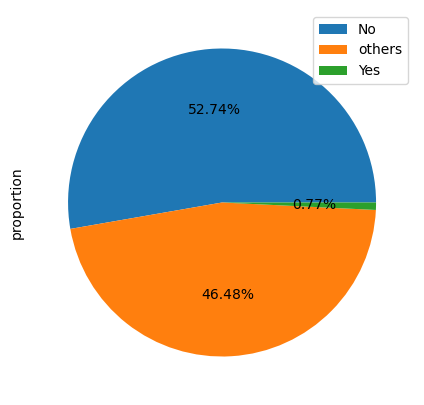

In [61]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct="%1.2f%%")
    plt.legend()
    plt.show()

## plot on numeric al columns 
### categorizing columns with and with out tags

In [62]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [63]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

### num_cols_withoutflag

count      5047.000000
mean     102948.440658
std        1704.810995
min      100002.000000
25%      101488.500000
50%      102944.000000
75%      104422.500000
max      105898.000000
Name: SK_ID_CURR, dtype: float64


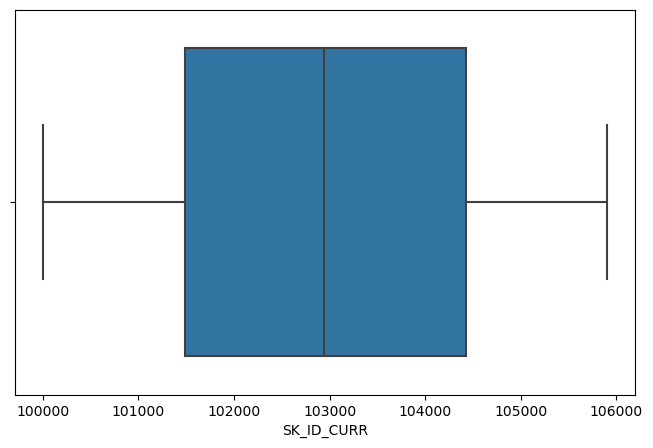

................
count    5047.000000
mean        0.077274
std         0.267052
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TARGET, dtype: float64


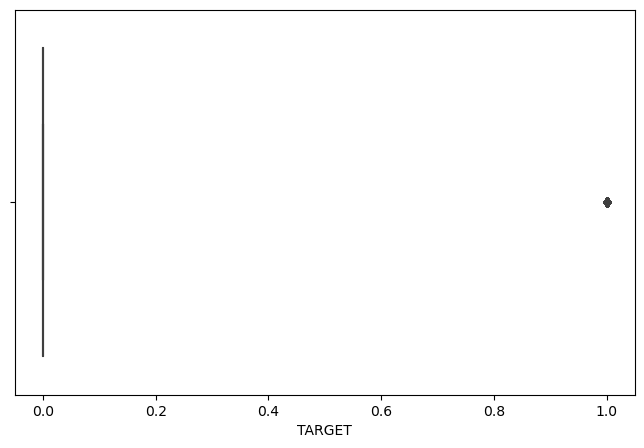

................
count    5047.000000
mean        0.406974
std         0.709775
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: CNT_CHILDREN, dtype: float64


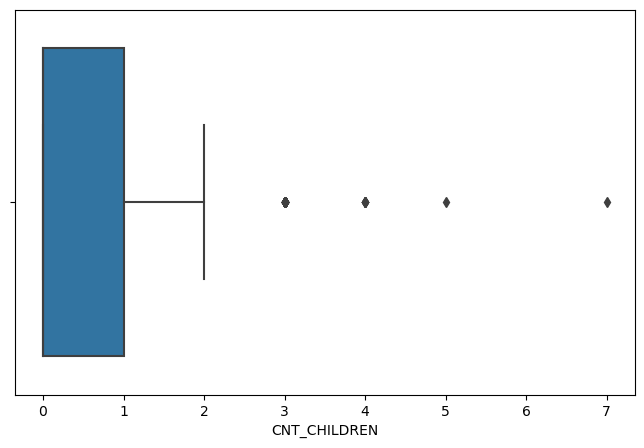

................
count     5047.000000
mean     16024.885080
std       4327.282499
min       7705.000000
25%      12449.000000
50%      15803.000000
75%      19567.000000
max      25160.000000
Name: DAYS_BIRTH, dtype: float64


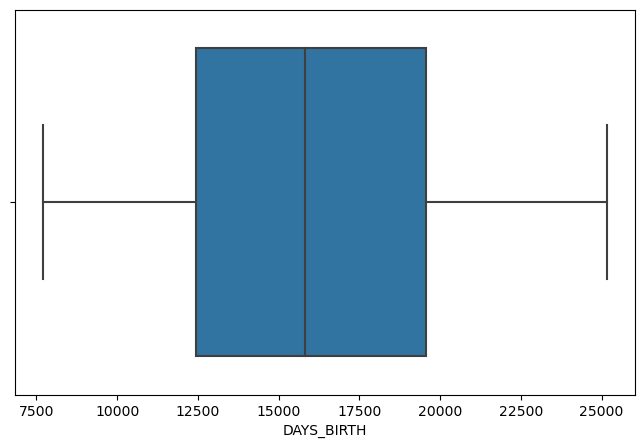

................
count      5047.000000
mean      68089.936200
std      139769.440797
min          17.000000
25%         920.000000
50%        2234.000000
75%        5671.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


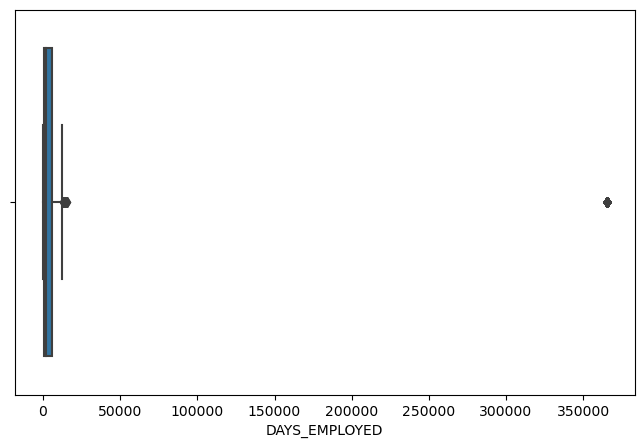

................
count     5047.000000
mean      4986.617595
std       3535.574302
min          0.000000
25%       1991.500000
50%       4528.000000
75%       7484.500000
max      20981.000000
Name: DAYS_REGISTRATION, dtype: float64


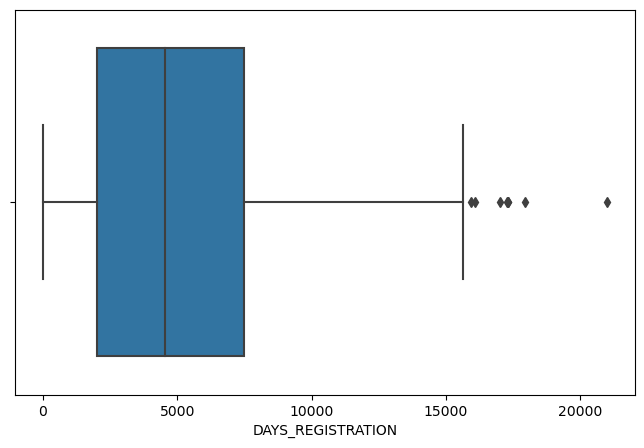

................
count    5047.000000
mean     2970.970478
std      1526.748250
min         0.000000
25%      1674.500000
50%      3199.000000
75%      4304.000000
max      6228.000000
Name: DAYS_ID_PUBLISH, dtype: float64


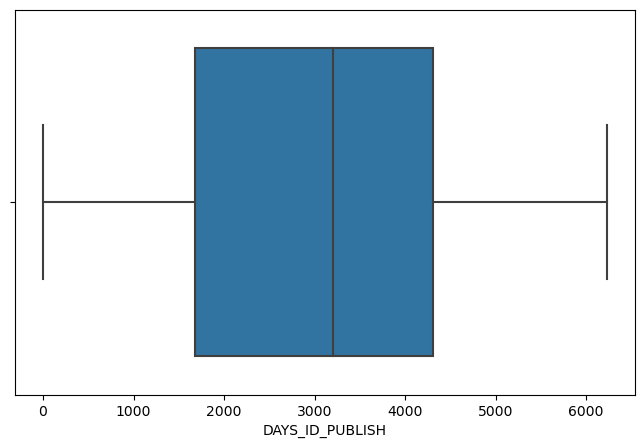

................
count    5047.000000
mean        2.137309
std         0.902483
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: CNT_FAM_MEMBERS, dtype: float64


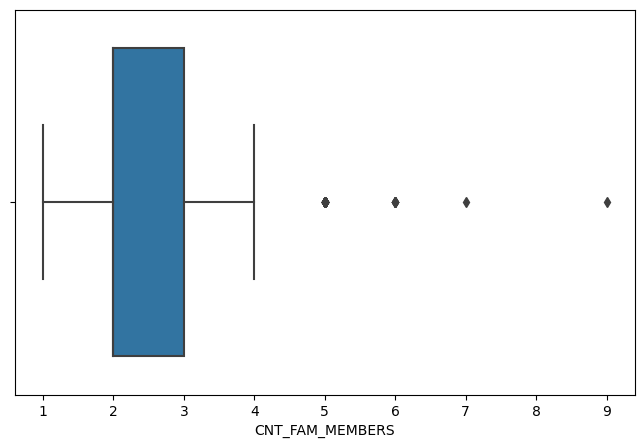

................
count    5047.000000
mean        2.047751
std         0.510588
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: REGION_RATING_CLIENT, dtype: float64


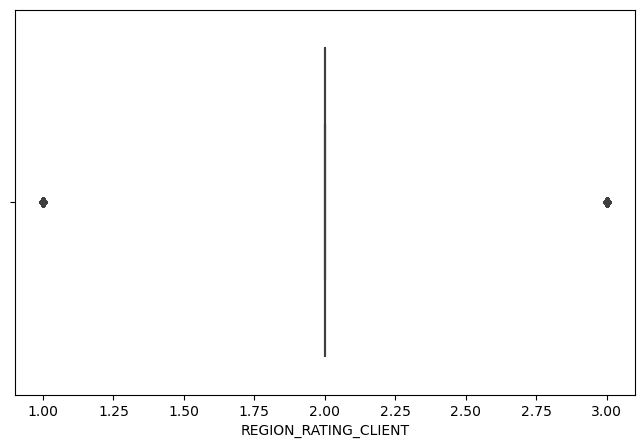

................
count    5047.000000
mean        2.025956
std         0.505538
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


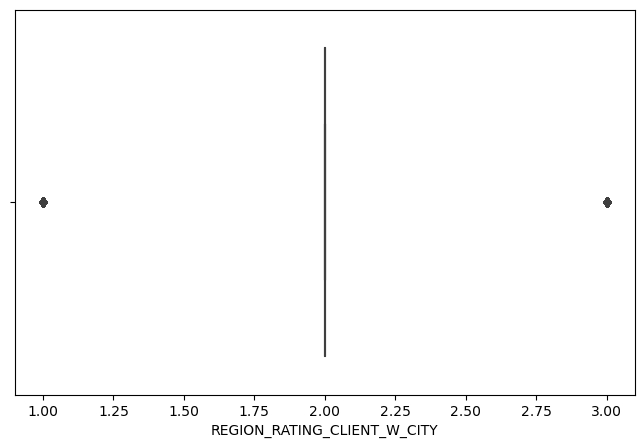

................
count    5047.000000
mean       12.069546
std         3.231968
min         1.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        22.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


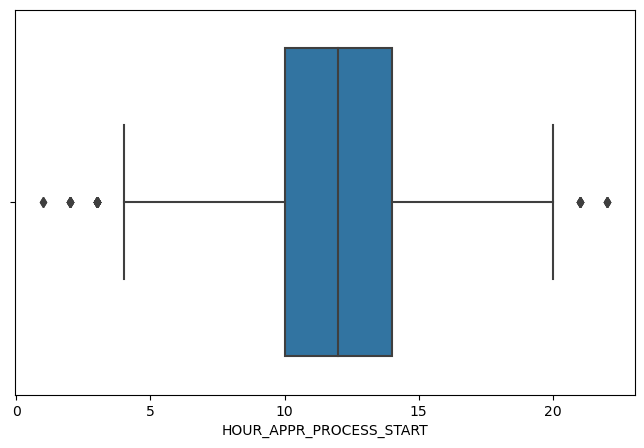

................
count    5047.000000
mean        0.018823
std         0.135913
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


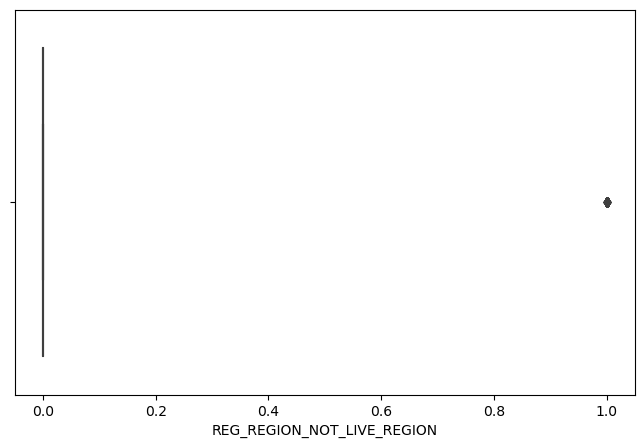

................
count    5047.000000
mean        0.050327
std         0.218640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


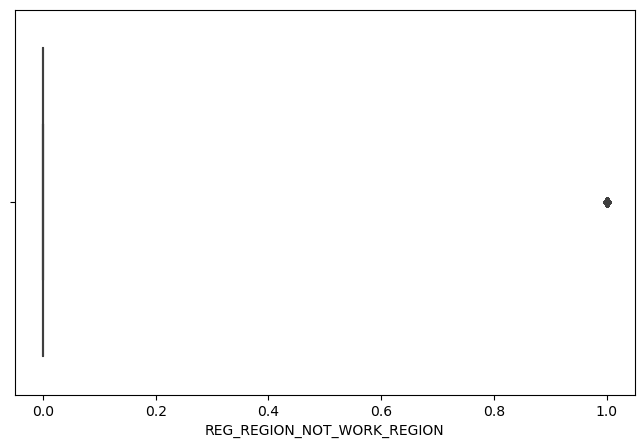

................
count    5047.000000
mean        0.037844
std         0.190838
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


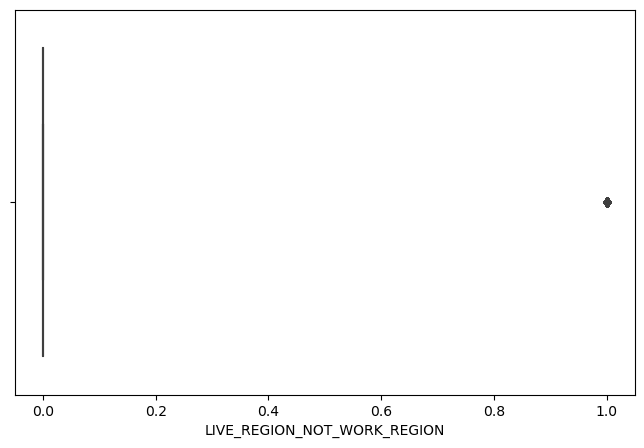

................
count    5047.000000
mean        0.085794
std         0.280087
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


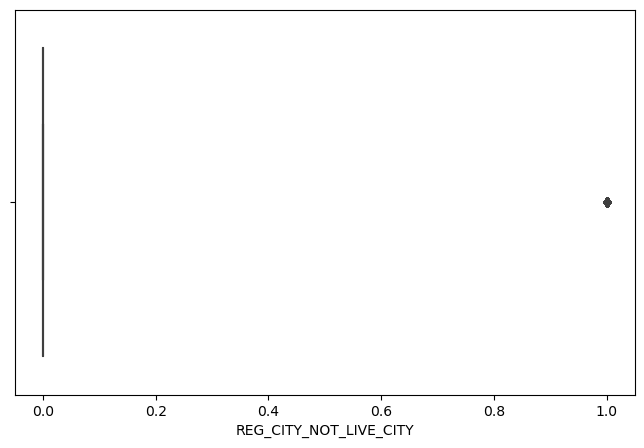

................
count    5047.000000
mean        0.238359
std         0.426122
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


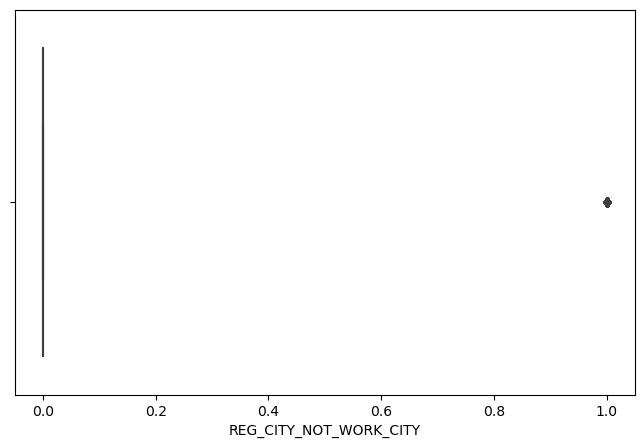

................
count    5047.000000
mean        0.177927
std         0.382490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


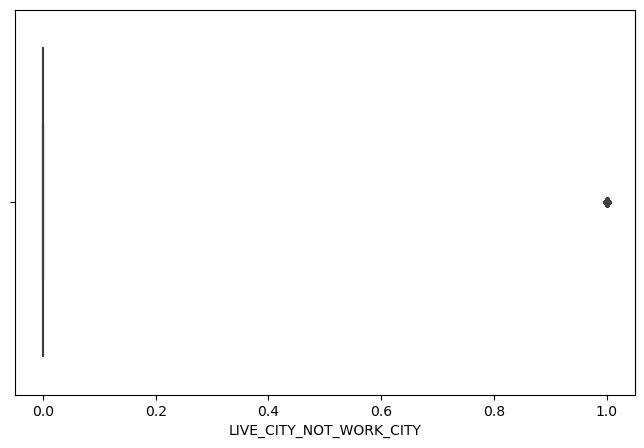

................
count    5047.000000
mean      953.383792
std       819.587958
min         0.000000
25%       260.000000
50%       743.000000
75%      1549.500000
max      3882.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


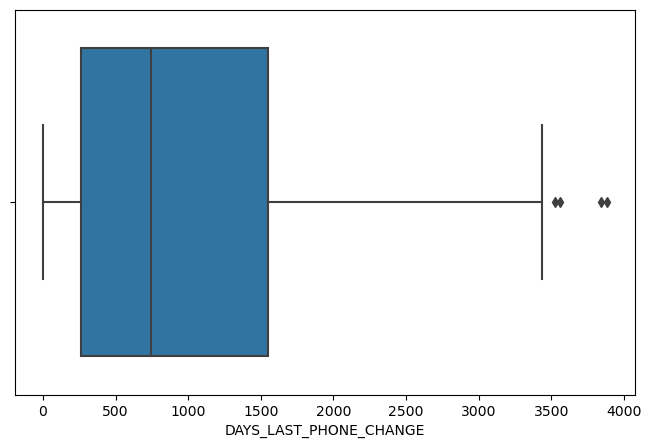

................
count    5047.000000
mean       44.519120
std        12.164335
min        21.000000
25%        34.000000
50%        44.000000
75%        54.000000
max        70.000000
Name: YEARS_BIRTH, dtype: float64


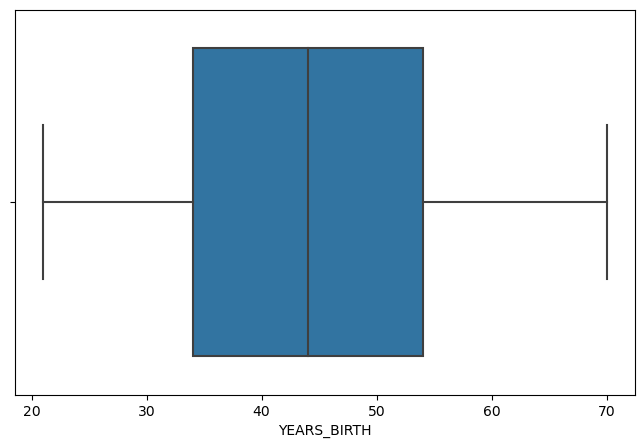

................
count    5047.000000
mean      190.679414
std       392.432654
min         0.000000
25%         2.000000
50%         6.000000
75%        15.000000
max      1025.000000
Name: YEARS_EMPLOYED, dtype: float64


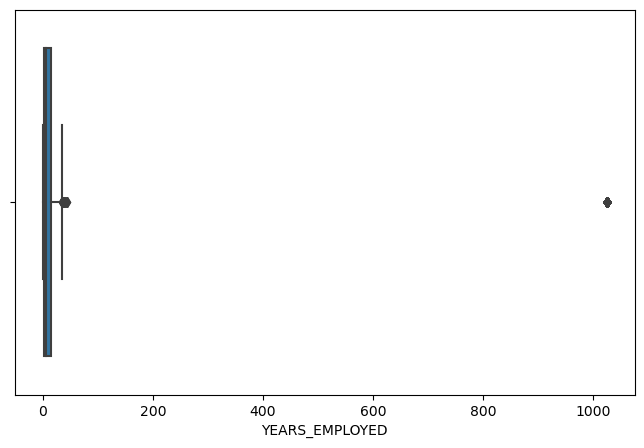

................
count    5047.000000
mean       13.511393
std         9.922101
min         0.000000
25%         5.000000
50%        12.000000
75%        21.000000
max        58.000000
Name: YEARS_REGISTRATION, dtype: float64


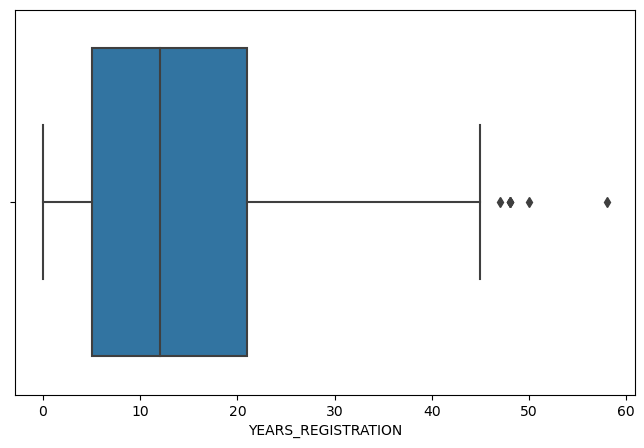

................
count    5047.000000
mean        7.851397
std         4.286244
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        17.000000
Name: YEARS_ID_PUBLISH, dtype: float64


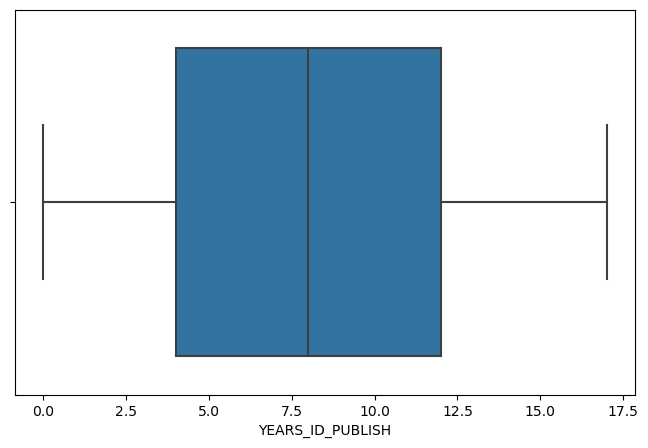

................
count    5047.000000
mean        2.272835
std         2.235594
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


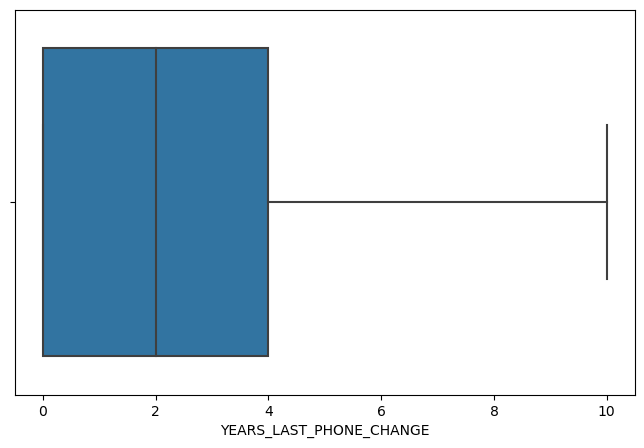

................
count    5.047000e+03
mean     1.677745e+05
std      9.755205e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


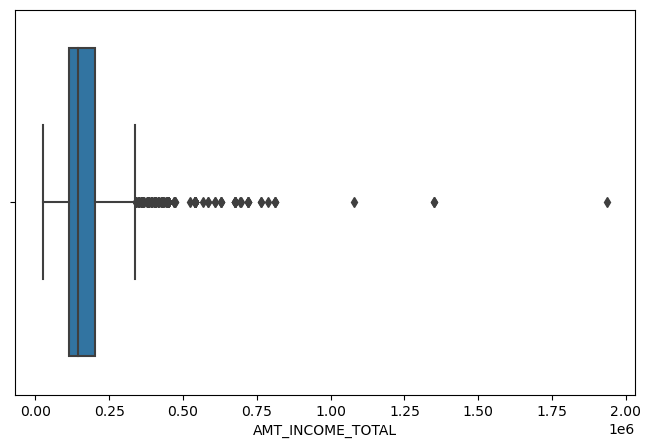

................
count    5.047000e+03
mean     5.967164e+05
std      4.005947e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64


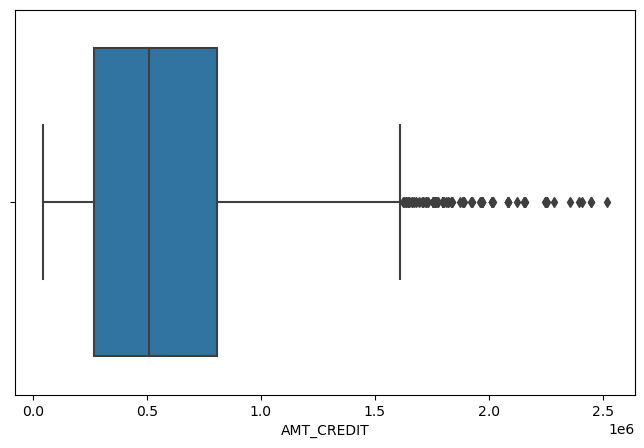

................
count      5047.000000
mean      27013.267287
std       14397.609747
min        2596.500000
25%       16456.500000
50%       24925.500000
75%       34587.000000
max      135936.000000
Name: AMT_ANNUITY, dtype: float64


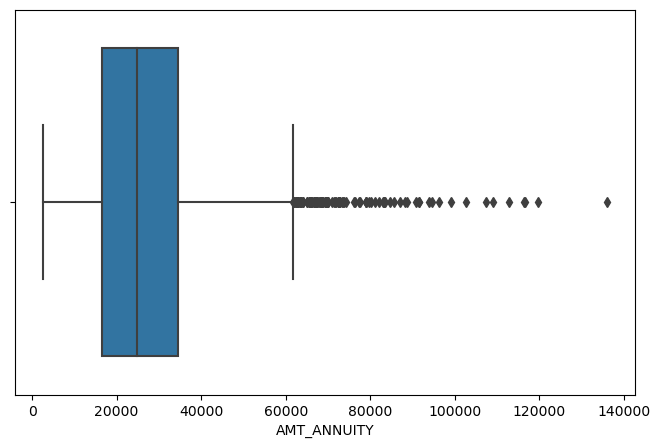

................
count    5.047000e+03
mean     5.367284e+05
std      3.680438e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.254500e+06
Name: AMT_GOODS_PRICE, dtype: float64


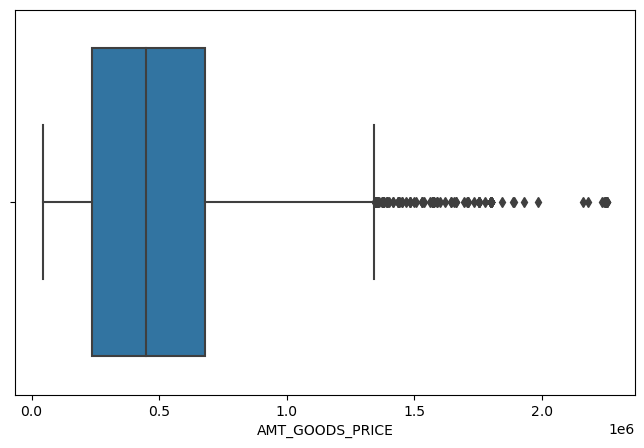

................
count    5047.000000
mean        0.020955
std         0.014094
min         0.000938
25%         0.010006
50%         0.018850
75%         0.028663
max         0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


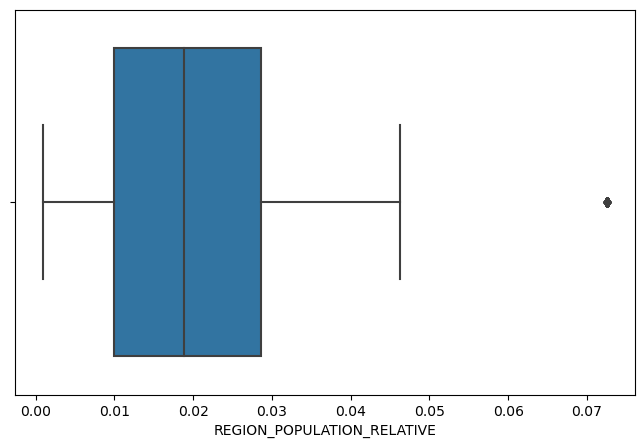

................
count    5047.000000
mean        0.513687
std         0.190247
min         0.000256
25%         0.390553
50%         0.565451
75%         0.663295
max         0.855000
Name: EXT_SOURCE_2, dtype: float64


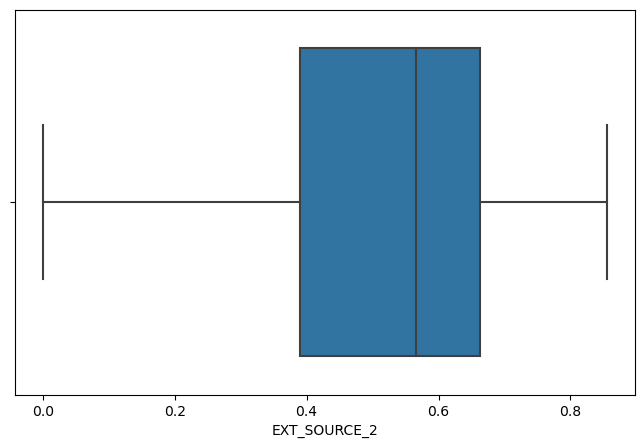

................
count    5047.000000
mean        0.514399
std         0.177154
min         0.000527
25%         0.418854
50%         0.529890
75%         0.639708
max         0.882530
Name: EXT_SOURCE_3, dtype: float64


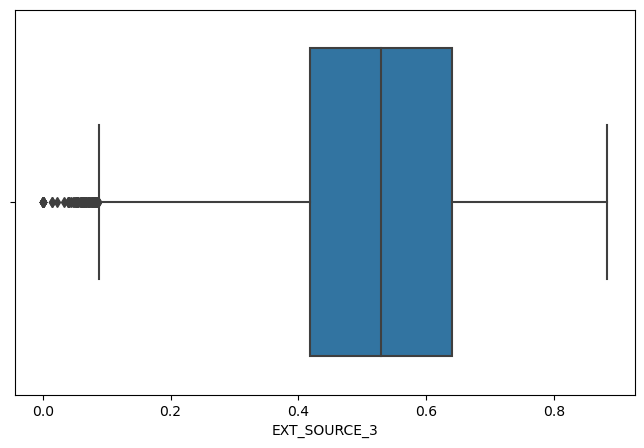

................
count    5047.000000
mean        1.390727
std         2.232231
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


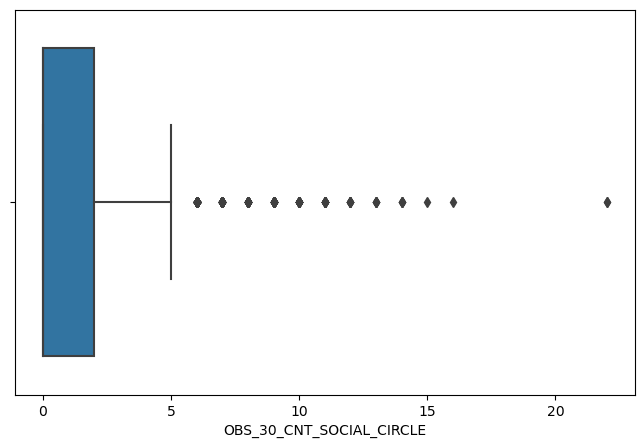

................
count    5047.000000
mean        0.148603
std         0.456283
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


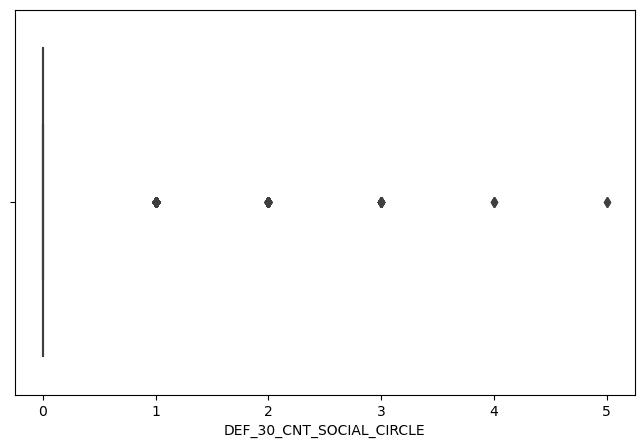

................
count    5047.000000
mean        1.377848
std         2.213999
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


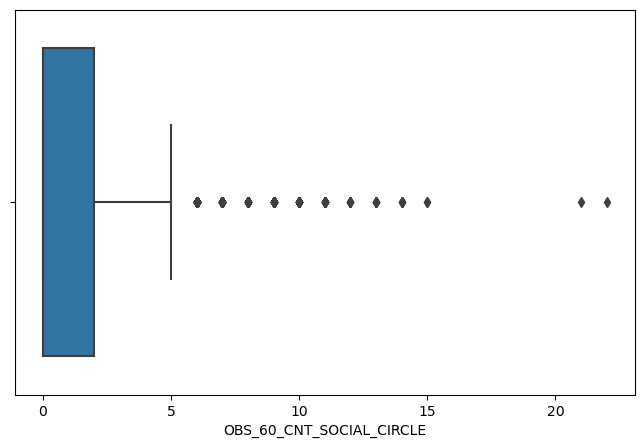

................
count    5047.000000
mean        0.102833
std         0.375009
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


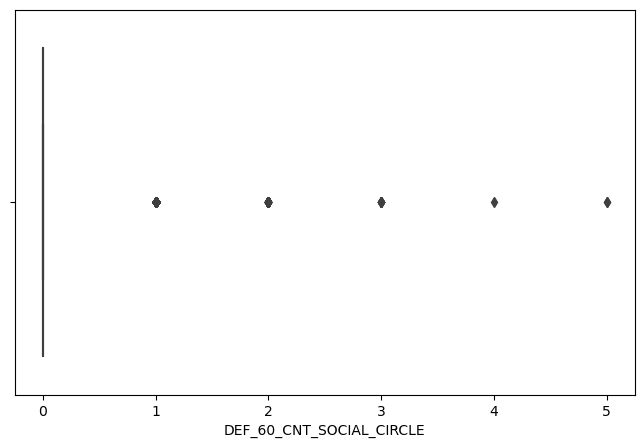

................
count    5047.000000
mean        0.007529
std         0.088715
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


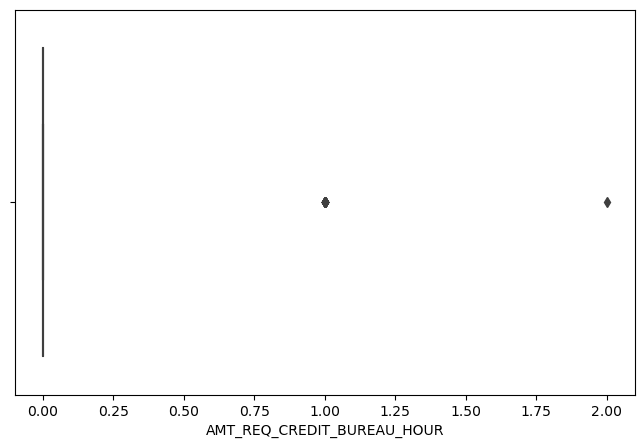

................
count    5047.000000
mean        0.007133
std         0.115867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


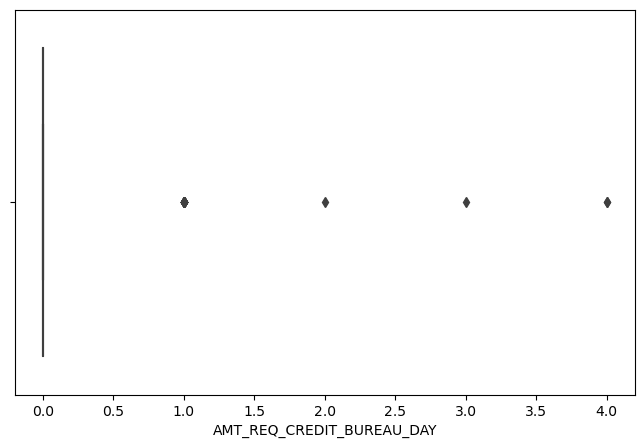

................
count    5047.000000
mean        0.030711
std         0.183678
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


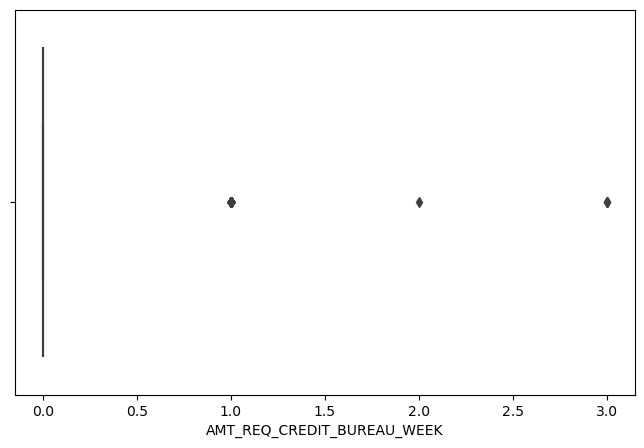

................
count    5047.000000
mean        0.230830
std         0.873043
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


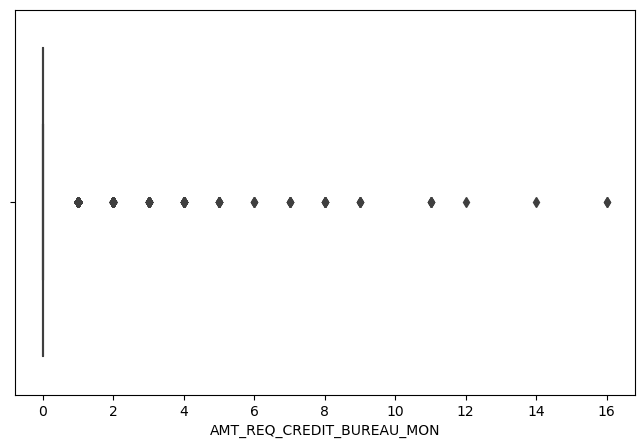

................
count    5047.000000
mean        0.239350
std         0.590395
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


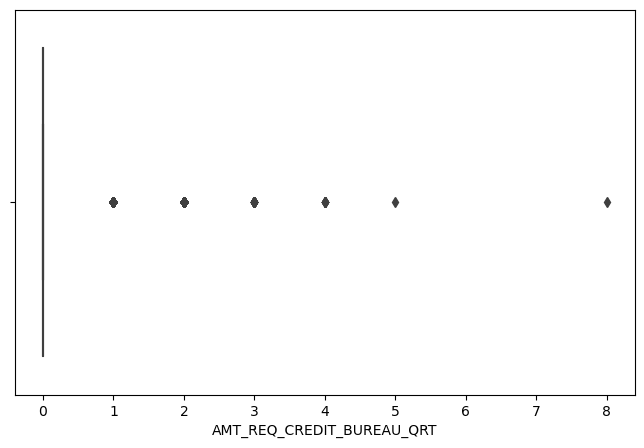

................
count    5047.000000
mean        1.621161
std         1.826375
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


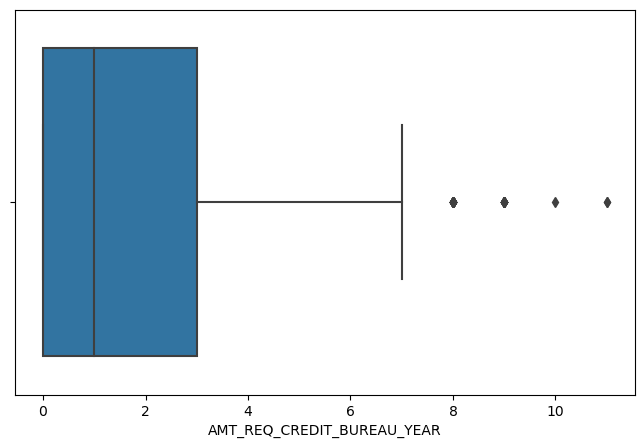

................


In [64]:
    for col in num_cols_withoutflag:
        print(app_df[col].describe())
        plt.figure(figsize = [8,5])
        sns.boxplot(data=app_df, x=col)
        plt.show()
        print("................")

##univarient analysis target 0 and 1

plot on NAME_CONTRACT_TYPE for Target 0 and 1


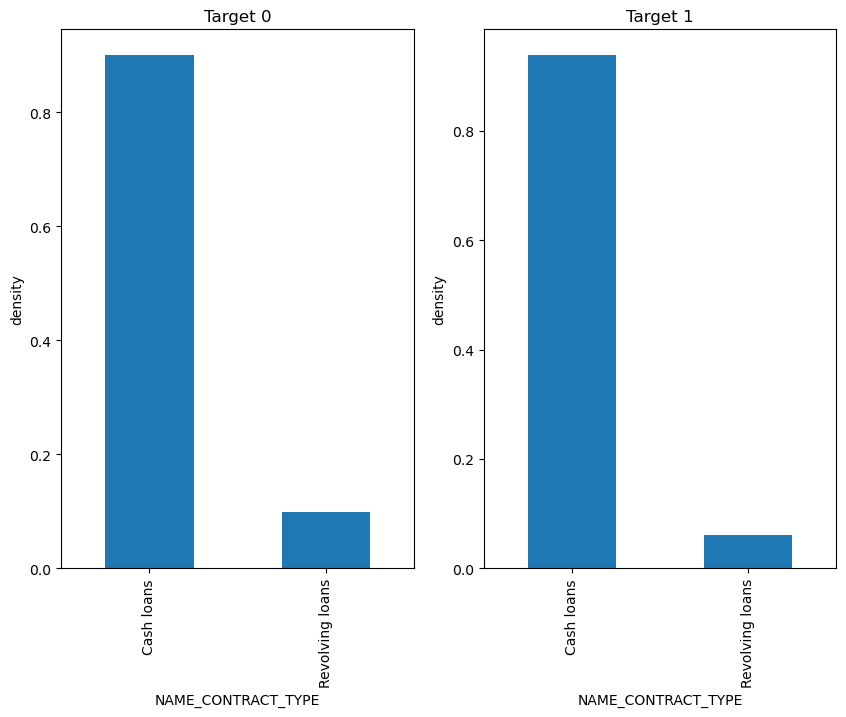


-----------------
plot on CODE_GENDER for Target 0 and 1


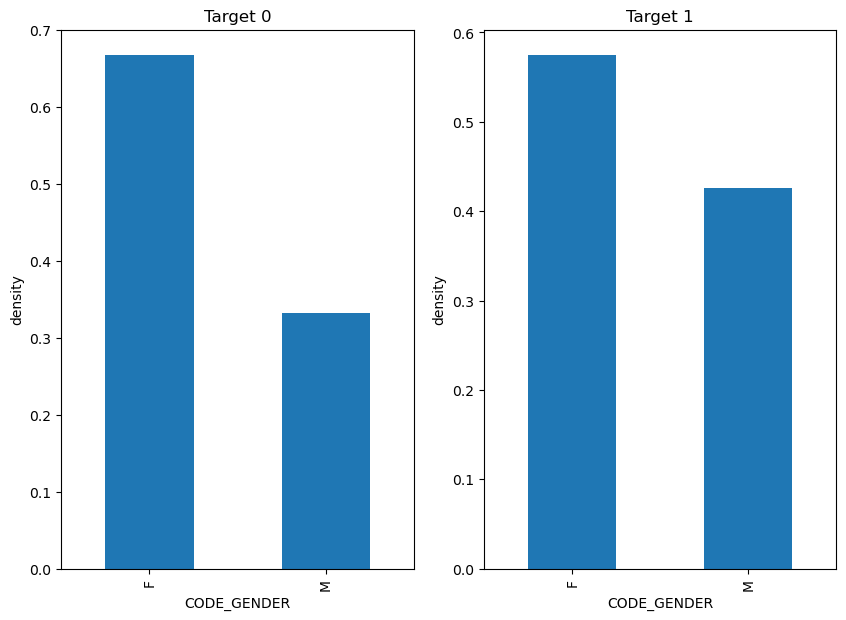


-----------------
plot on FLAG_OWN_CAR for Target 0 and 1


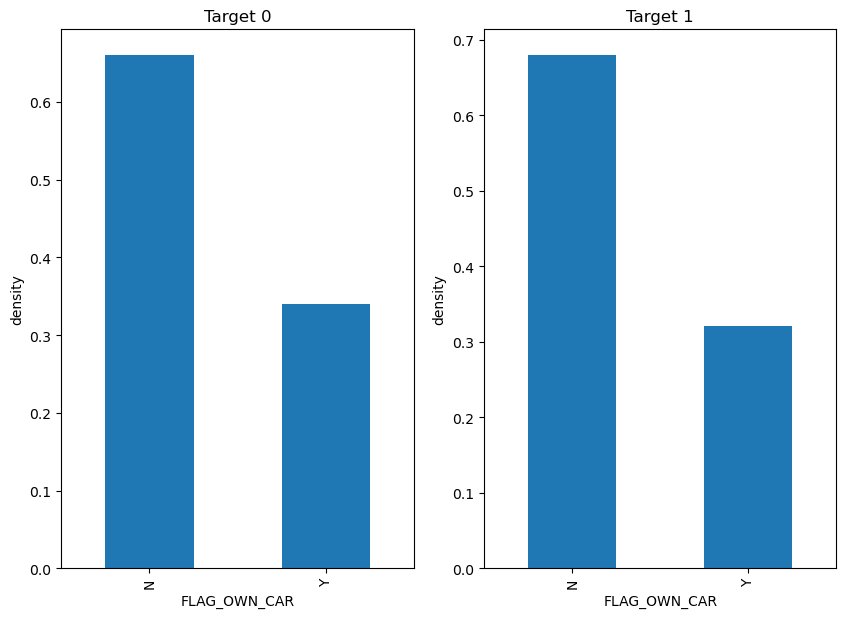


-----------------
plot on FLAG_OWN_REALTY for Target 0 and 1


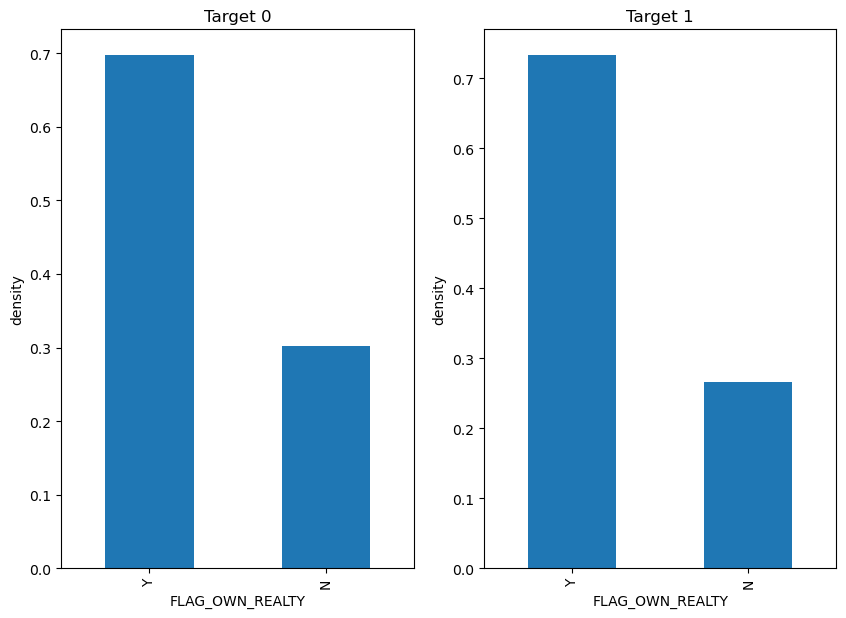


-----------------
plot on NAME_TYPE_SUITE for Target 0 and 1


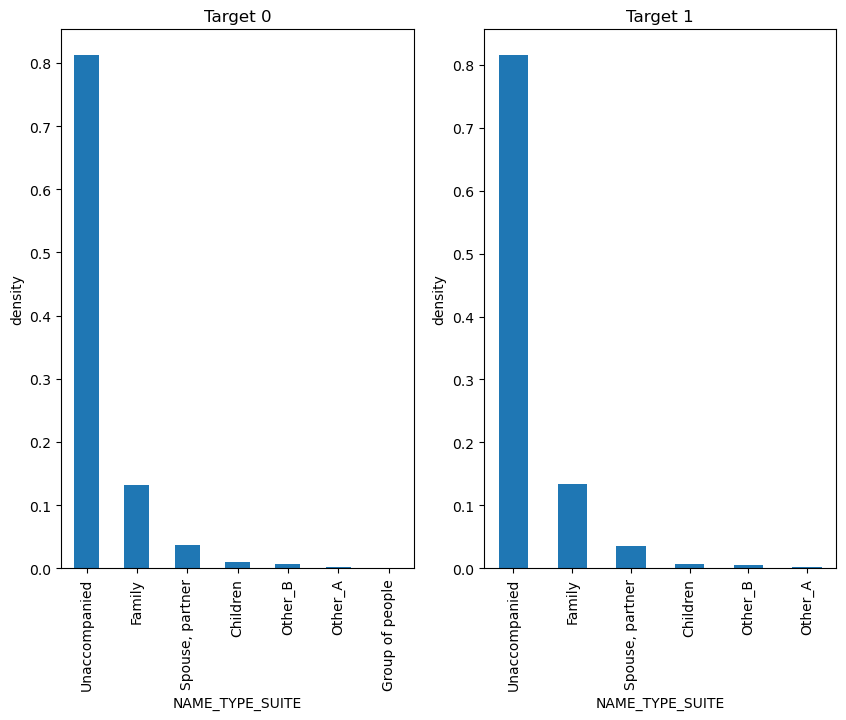


-----------------
plot on NAME_INCOME_TYPE for Target 0 and 1


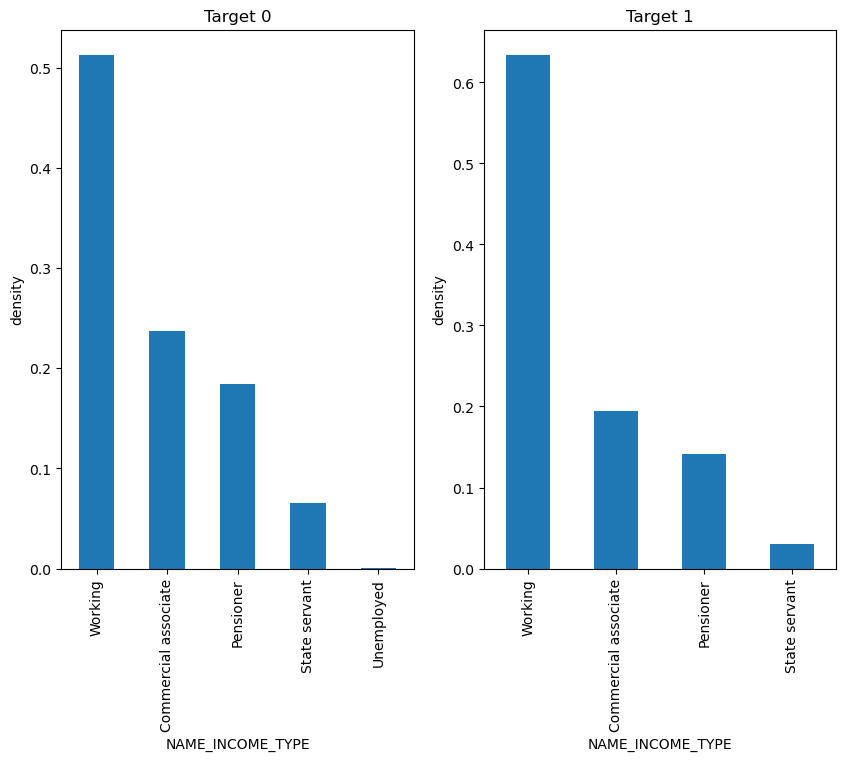


-----------------
plot on NAME_EDUCATION_TYPE for Target 0 and 1


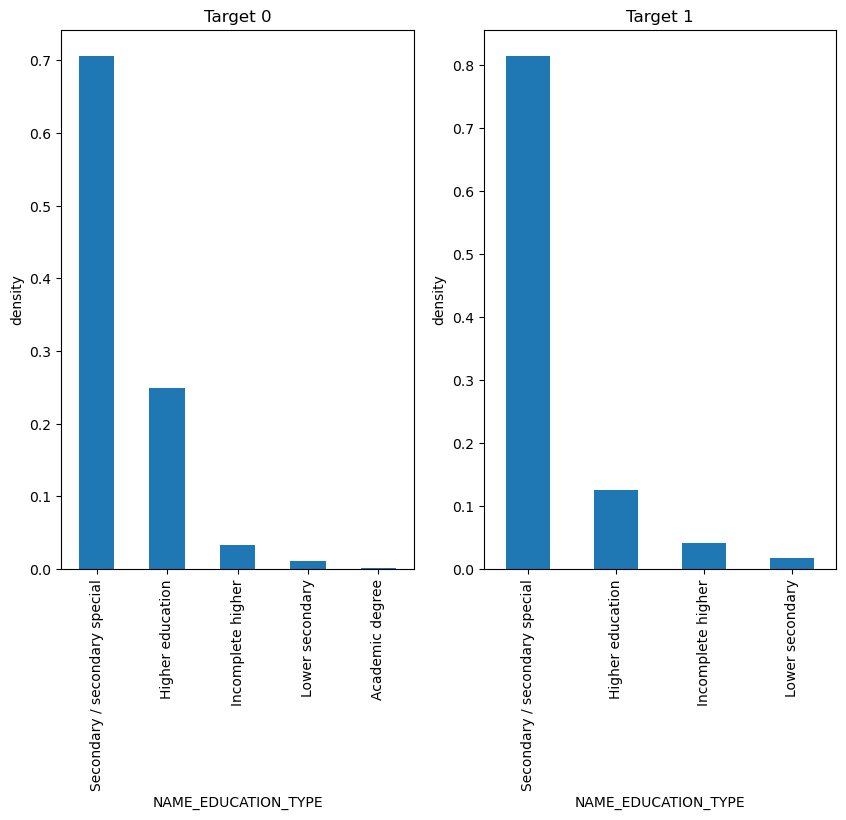


-----------------
plot on NAME_FAMILY_STATUS for Target 0 and 1


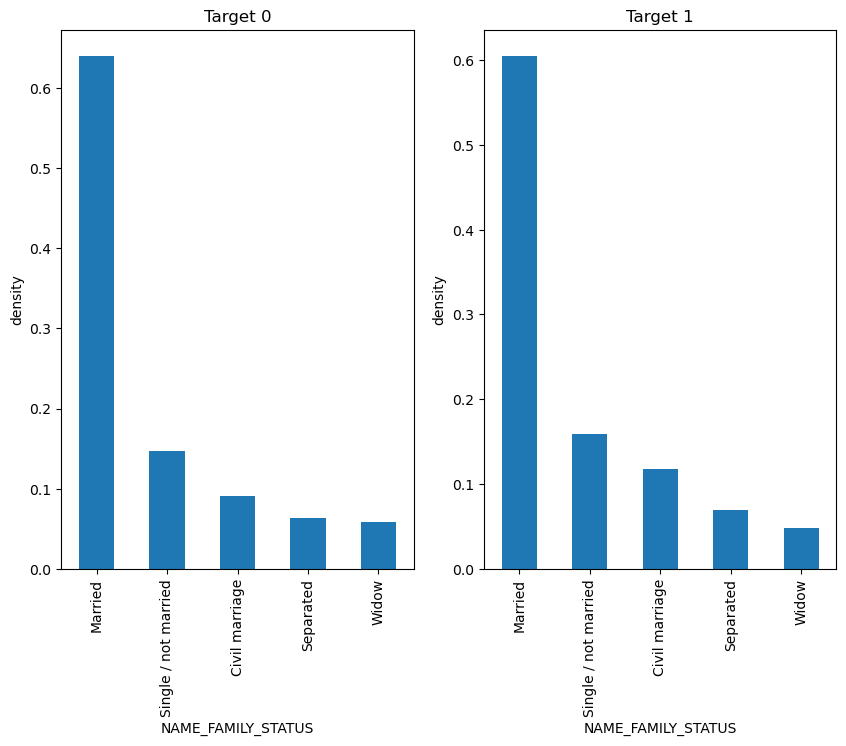


-----------------
plot on NAME_HOUSING_TYPE for Target 0 and 1


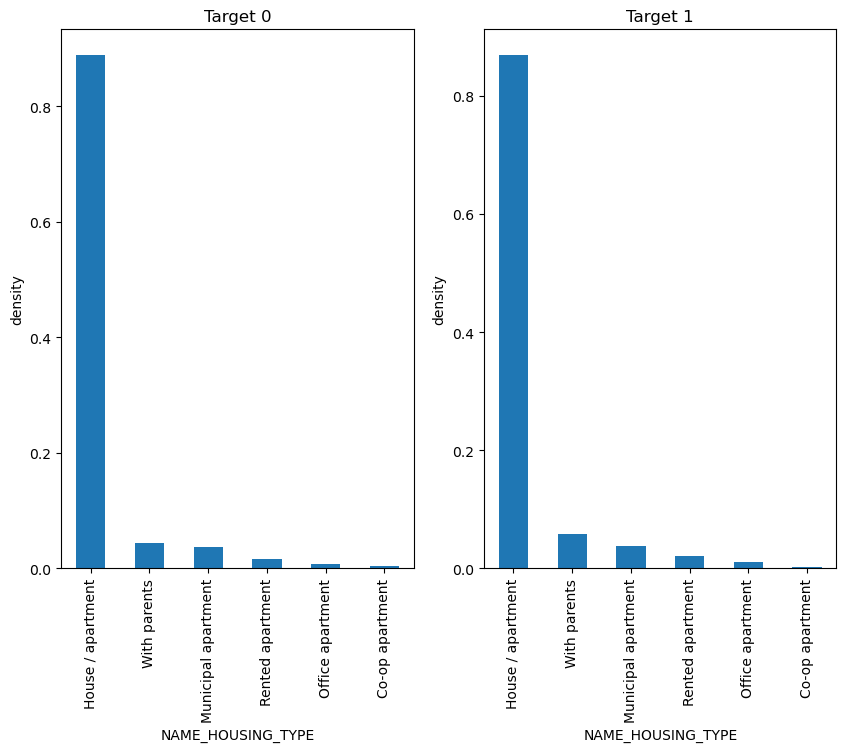


-----------------
plot on OCCUPATION_TYPE for Target 0 and 1


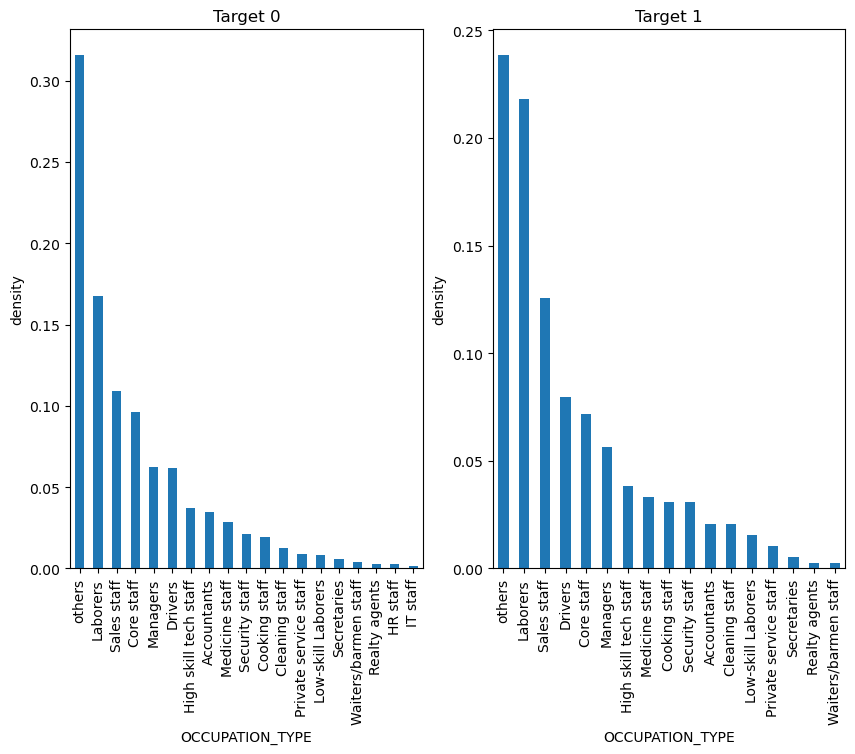


-----------------
plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


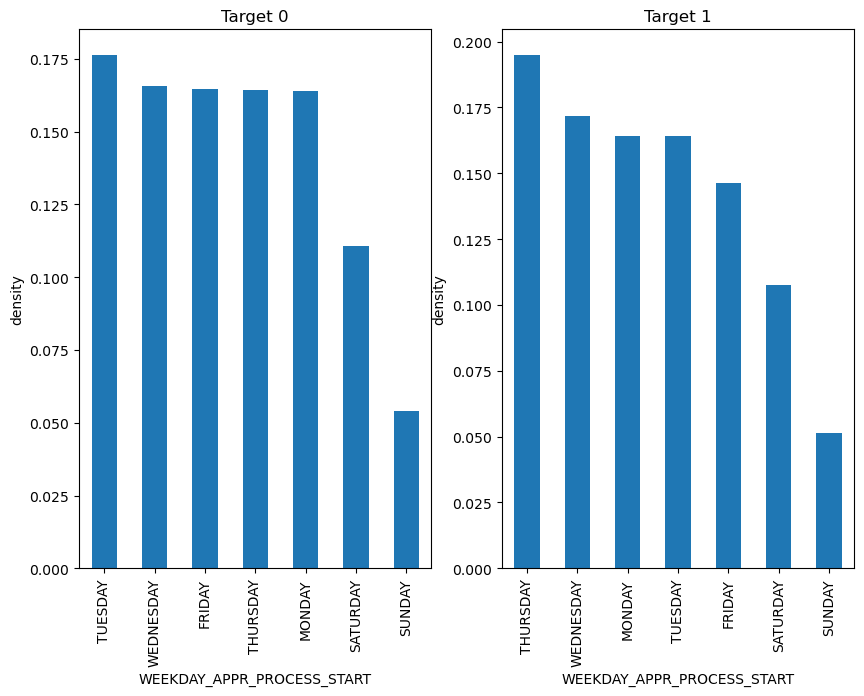


-----------------
plot on ORGANIZATION_TYPE for Target 0 and 1


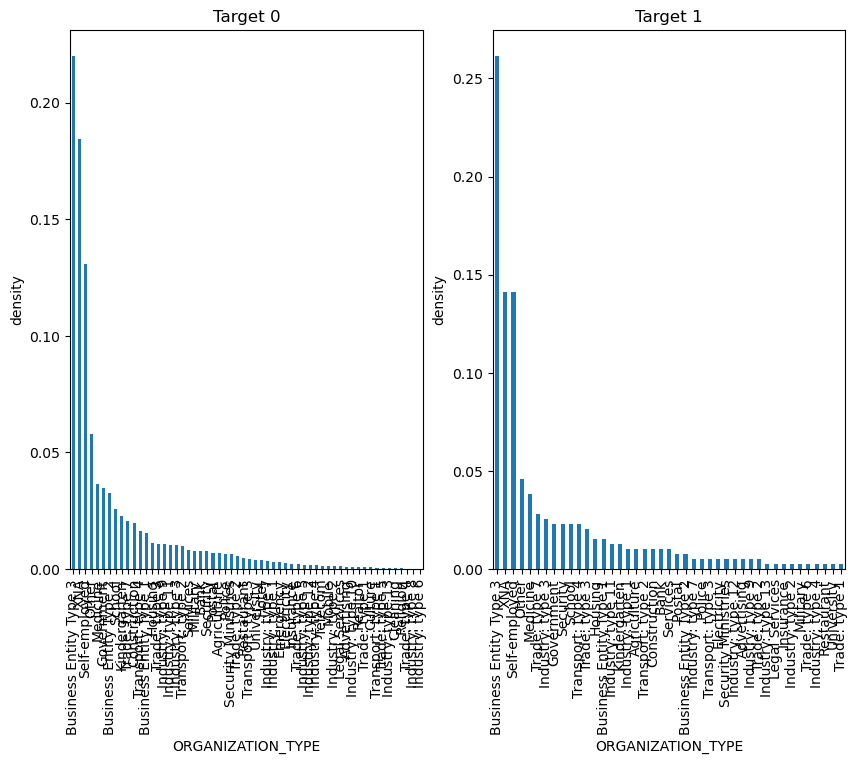


-----------------
plot on EMERGENCYSTATE_MODE for Target 0 and 1


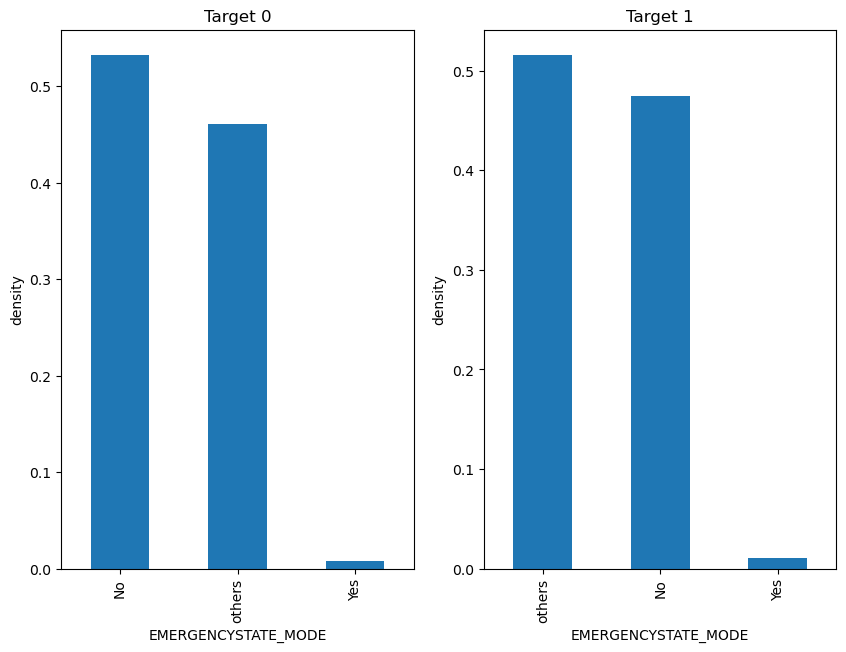


-----------------


In [65]:
for col in cat_cols:
    print(f"plot on {col} for Target 0 and 1")
    plt.figure(figsize = [10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("density")
    plt.show()
    print("\n-----------------")

##anaiyse on AMT_GOODS_PRICE on target 0 and 1

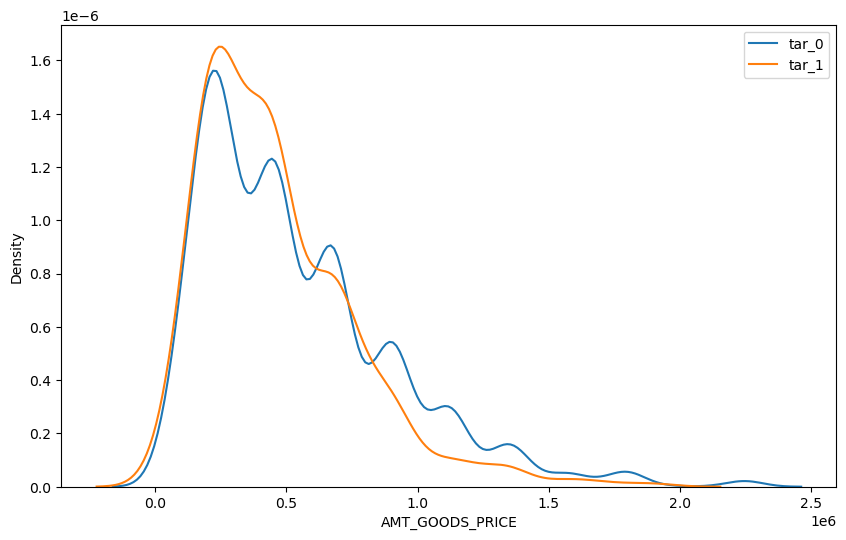

In [66]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label= 'tar_0' , hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'], label= 'tar_1' , hist=False)
plt.legend()
plt.show()

conclusion : the price of goods for which loan has the same variation for target 0 and 1

#bivarent and multivarient analysis
##bivarient analysis between WEEKDAY_APPR_PROCESS_START VS HOUR_APPR_PROCESS_START

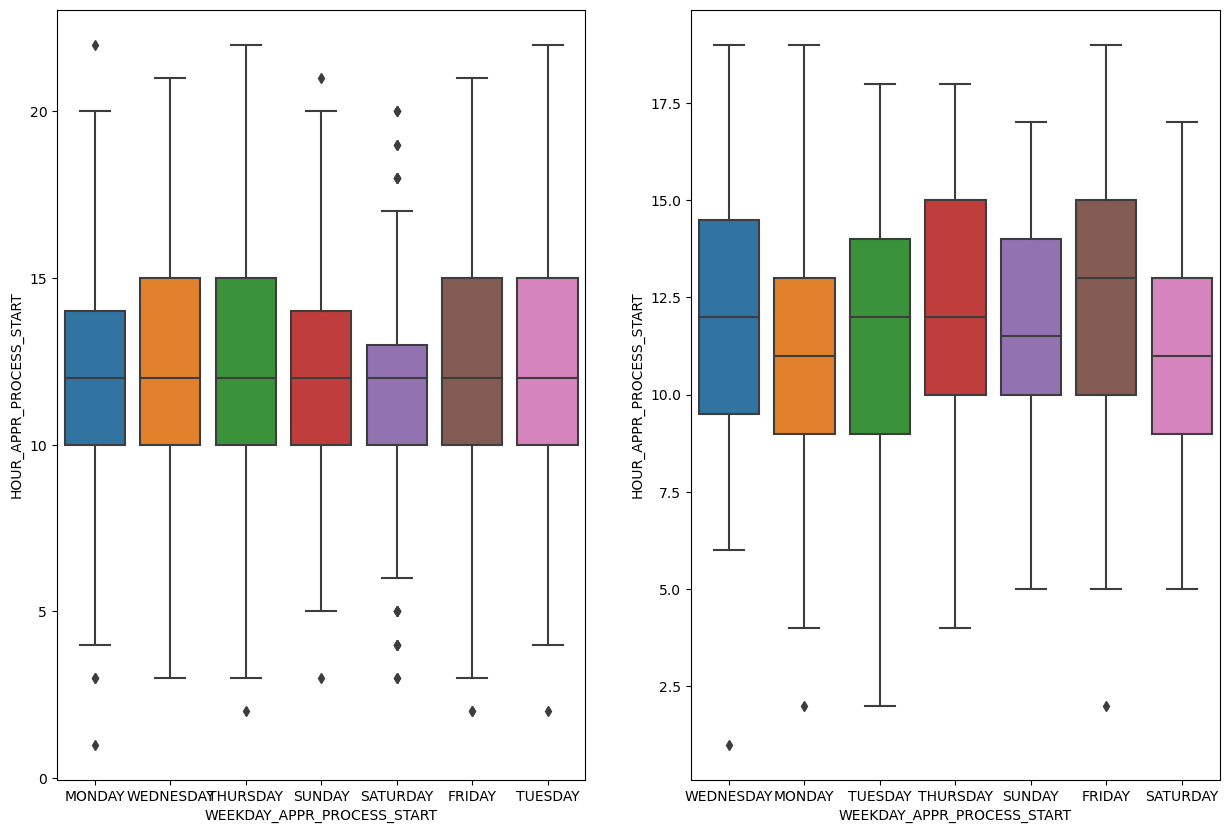

In [67]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START' , data= tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START' , data= tar_1)
plt.show()

## bivarent analysis between AGE_CATEGORY VS AMT_CREDIT

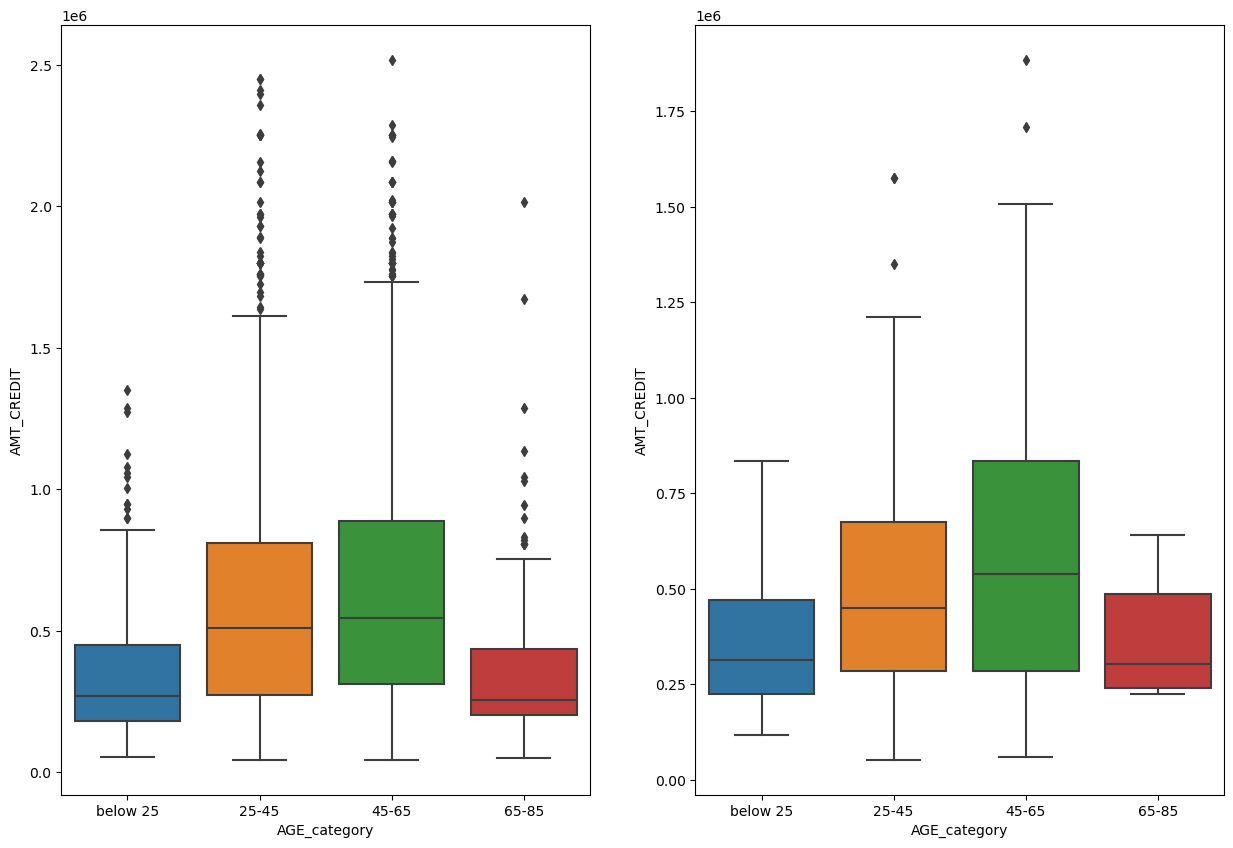

In [68]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='AGE_category', y='AMT_CREDIT' , data= tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_category', y='AMT_CREDIT' , data= tar_1)
plt.show()

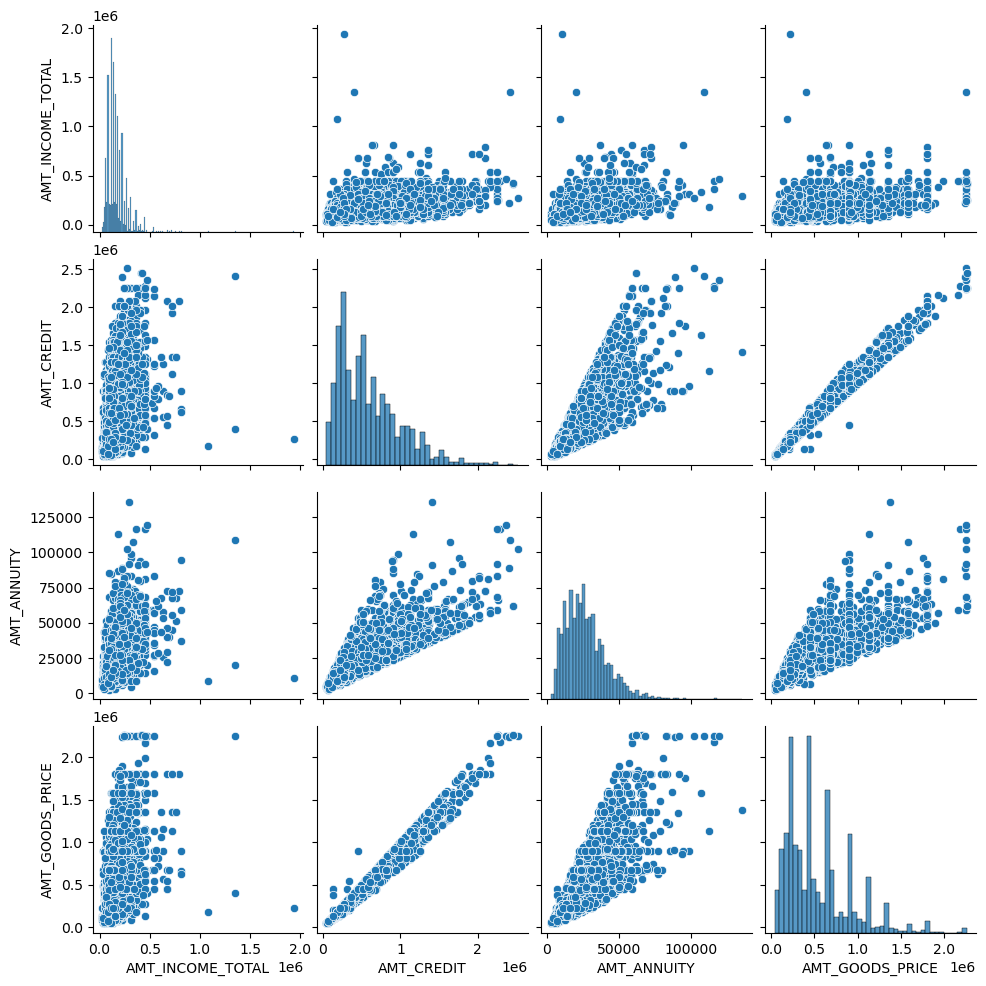

In [69]:
sns.pairplot(tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

pair plot of amount columns for target 1

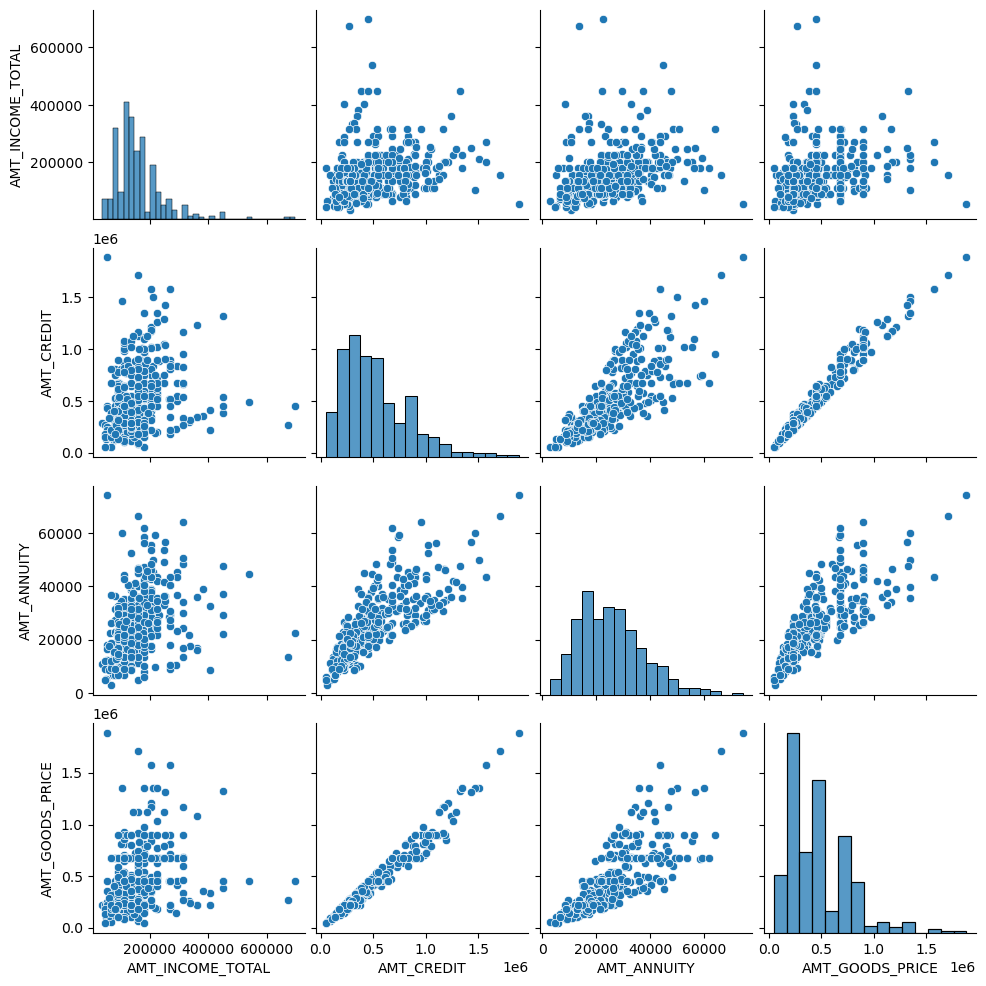

In [70]:
sns.pairplot(tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

##corelation between numeric columnn

In [71]:
corr_data = app_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [72]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.392799     0.461359   
AMT_CREDIT                       0.392799    1.000000     0.787495   
AMT_ANNUITY                      0.461359    0.787495     1.000000   
AMT_GOODS_PRICE                  0.400948    0.986369     0.789500   
YEARS_BIRTH                     -0.088416    0.070193    -0.013441   
YEARS_EMPLOYED                  -0.168456   -0.087328    -0.126458   
YEARS_REGISTRATION              -0.088404   -0.009568    -0.038698   
YEARS_ID_PUBLISH                -0.030893    0.012275    -0.001908   
YEARS_LAST_PHONE_CHANGE          0.013834    0.055117     0.049818   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.400948    -0.088416       -0.168456   
AMT_CREDIT                      0.986369     0.070193       -0.087328   
AMT_ANNUITY                     0.789500    -0.013441       -0.126458   
AMT_GOODS_PRICE                 1.000000     0.068469       -0.084717   
YEARS_BIRTH                     0.068469     1.000000        0.627062   
YEARS_EMPLOYED                 -0.084717     0.627062        1.000000   
YEARS_REGISTRATION             -0.014119     0.340730        0.230058   
YEARS_ID_PUBLISH                0.014931     0.263203        0.284902   
YEARS_LAST_PHONE_CHANGE         0.058056     0.095969       -0.016813   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.088404         -0.030893   
AMT_CREDIT                        -0.009568          0.012275   
AMT_ANNUITY                       -0.038698         -0.001908   
AMT_GOODS_PRICE                   -0.014119          0.014931   
YEARS_BIRTH                        0.340730          0.263203   
YEARS_EMPLOYED                     0.230058          0.284902   
YEARS_REGISTRATION                 1.000000          0.124020   
YEARS_ID_PUBLISH                   0.124020          1.000000   
YEARS_LAST_PHONE_CHANGE            0.048788          0.075190   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.013834  
AMT_CREDIT                              0.055117  
AMT_ANNUITY                             0.049818  
AMT_GOODS_PRICE                         0.058056  
YEARS_BIRTH                             0.095969  
YEARS_EMPLOYED                         -0.016813  
YEARS_REGISTRATION                      0.048788  
YEARS_ID_PUBLISH                        0.075190  
YEARS_LAST_PHONE_CHANGE                 1.000000

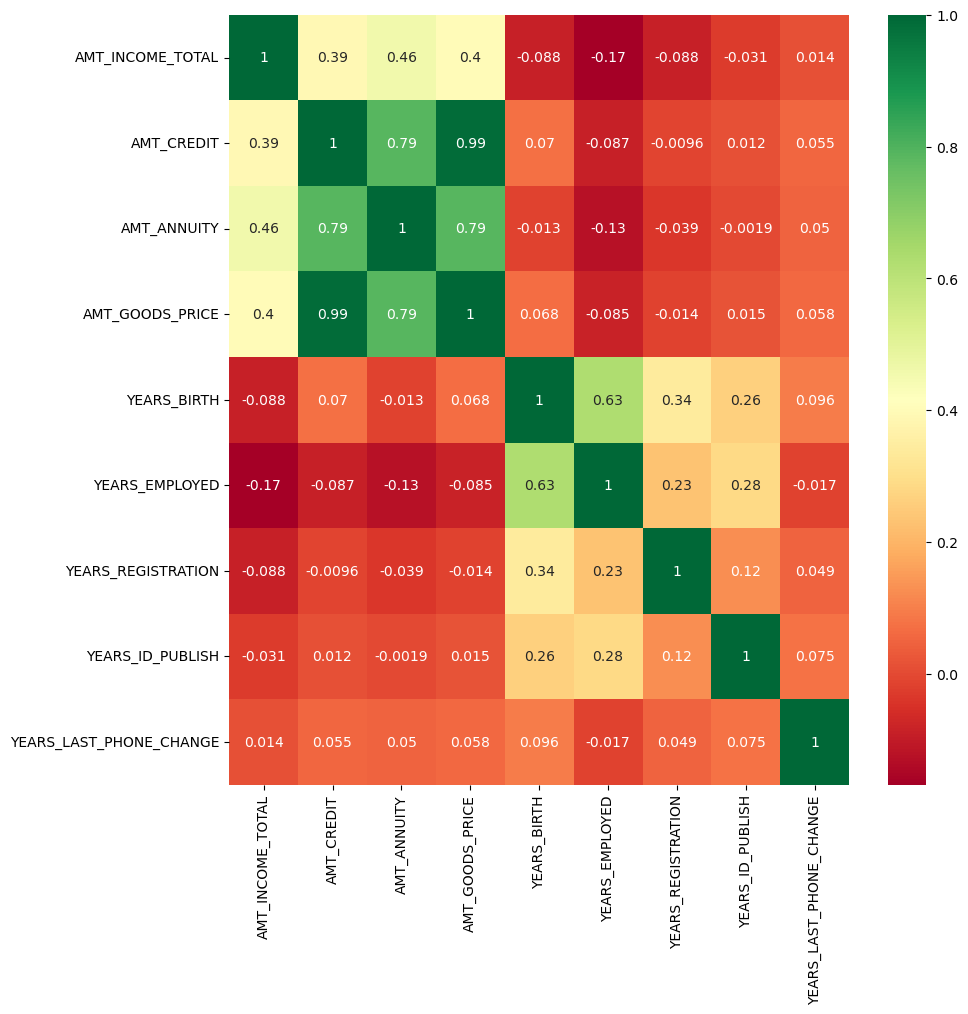

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")
plt.show()


###split the numeric variables based on target 0 and 1 to find the corelation

In [74]:
corr_data_0 = tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [75]:
corr_data_1 = tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                  10                 5   
1               3                   3                 0   
2               0                  11                 7   
3               8                  27                 6   
4               8                  12                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

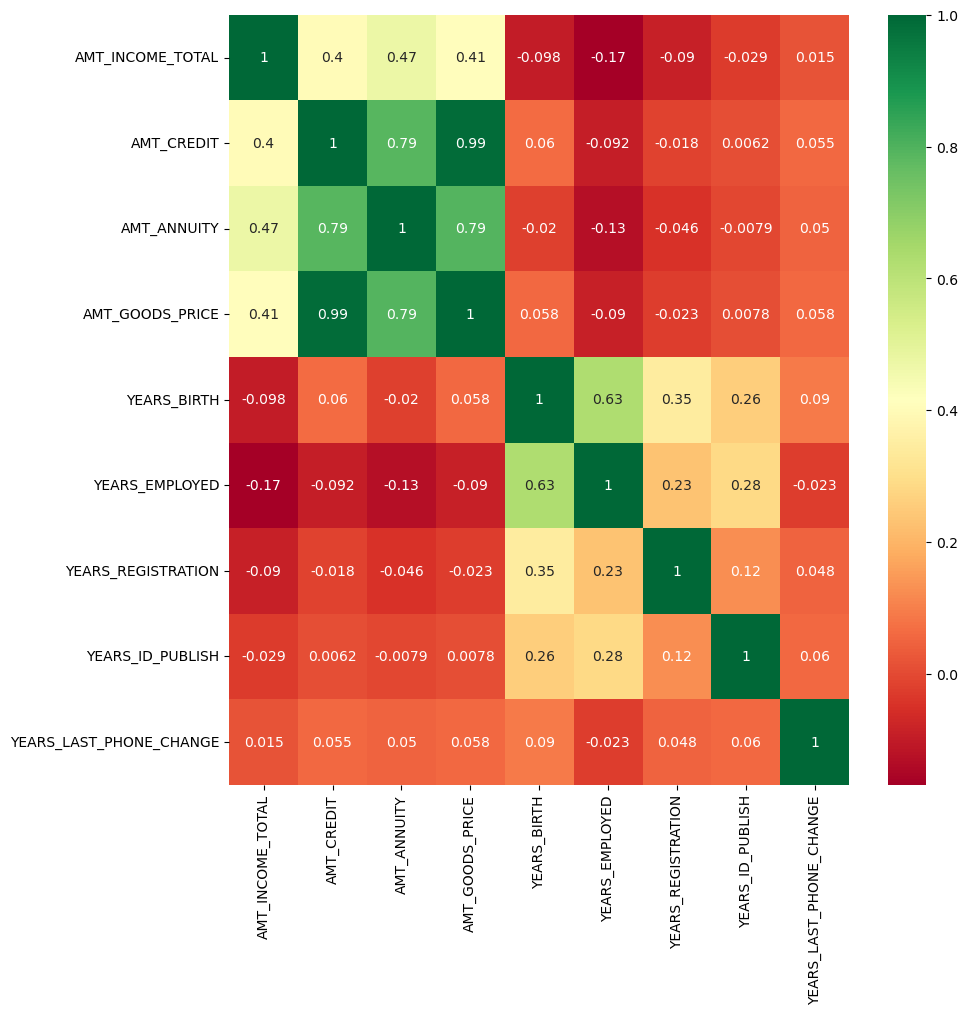

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")
plt.show()


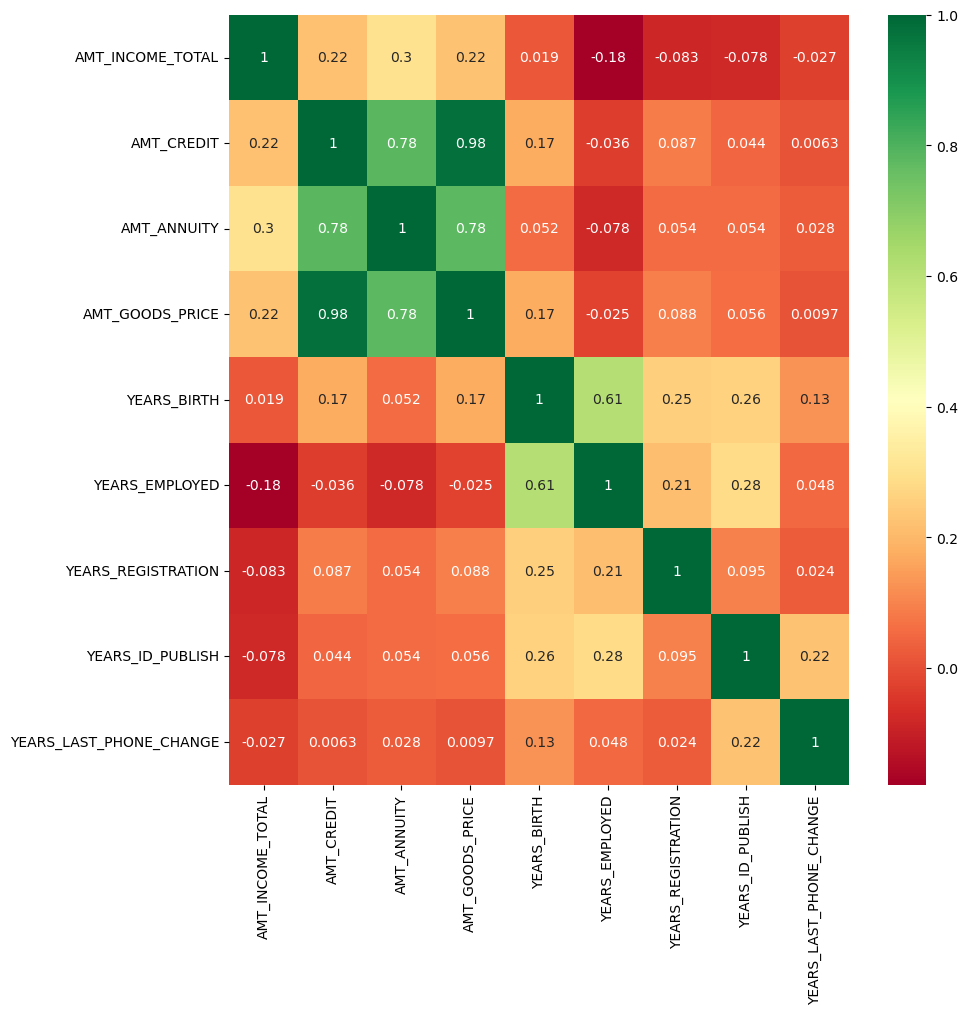

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True,cmap="RdYlGn")
plt.show()


###reading previous application csv

In [78]:
papp_data= pd.read_csv("previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

data inspection on previous aplication dataset
get info and shap on the dataset

In [79]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [80]:
papp_data.shape

(1670214, 37)

## data quality check 
## check percentage null values in application dataset

In [81]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [82]:
percentage = 48
threshold_p = int(((100-percentage)/100)*papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis=1, thresh=threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [83]:
papp_df.shape

(1670214, 32)

impute missing values, check the dtype of missing values in application dataset before imputing values

In [84]:
import numpy as np

for col in papp_df.columns:
    if papp_df[col].dtype == np.int64 or papp_df[col].dtype == np.float64:
        papp_df[col] = papp_df[col].abs()


#validate if any null values present in dataset

In [85]:
null_cols = list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

11

##binning of contineous variable 
### binning AMT_CRIDIT column

In [86]:
papp_df.AMT_CREDIT.value_counts(normalize = True)*100

AMT_CREDIT
0.00         20.163177
45000.00      2.098595
225000.00     1.262953
450000.00     1.194698
135000.00     1.120815
               ...    
262768.50     0.000060
354213.00     0.000060
438817.50     0.000060
253111.50     0.000060
436370.22     0.000060
Name: proportion, Length: 86803, dtype: float64

In [87]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [88]:
papp_df["AMT_CREDIT"].unique()

array([ 17145.  , 679671.  , 136444.5 , ..., 977724.  , 626796.  ,
       436370.22])

In [89]:
import numpy as np

# Apply the absolute function to all numeric columns
for col in papp_df.select_dtypes(include=[np.number]).columns:
    papp_df[col] = papp_df[col].abs()

# Now try the pd.cut() function again
papp_df["AMT_CREDIT_category"] = pd.cut(
    papp_df["AMT_CREDIT"],
    bins=[0, 200000, 400000, 600000, 800000, 10000000],
    labels=["very low credit", "low credit", "medium credit", "high credit", "very high credit"]
)



In [90]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

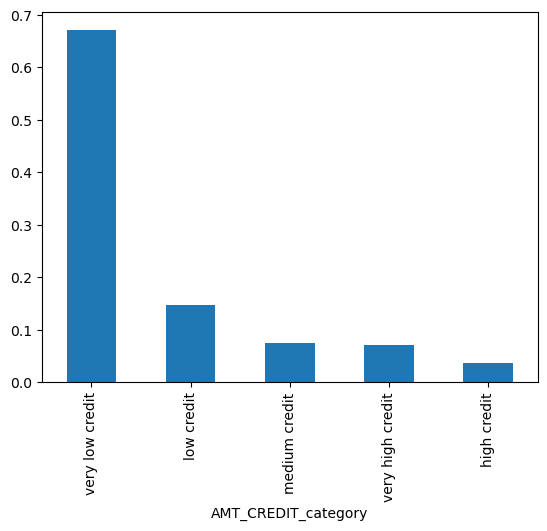

In [91]:
papp_df['AMT_CREDIT_category'].value_counts(normalize=True).plot.bar()
plt.show()

### conclusion = credit amount of the lone for most application is either low (200000 to 400000)

In [92]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.qcut(papp_df["AMT_GOODS_PRICE"], q=[0,0.25,0.45,0.65,0.85,1], labels=["very low PRICE", "low PRICE", "medium PRICE", "high PRICE", "very high PRICE"])


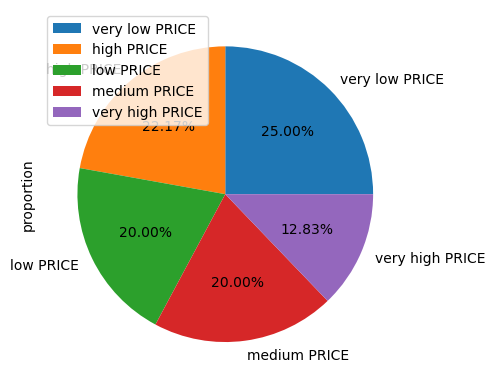

In [93]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.legend()
plt.show()


### Data imbalance check

dividing application dataset with NAME_CONTRACT_STATUS

In [94]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS =="Approved"]
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS =="Canceled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS =="Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS =="Unused offer"]

In [95]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

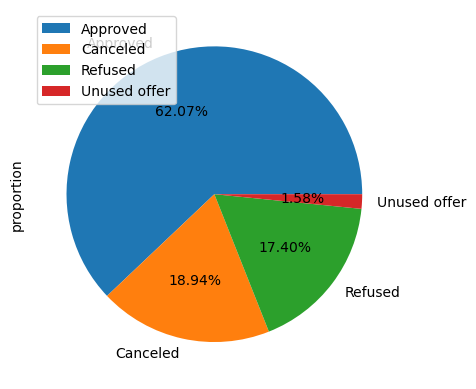

In [96]:
papp_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.legend()
plt.show()

conclusion = 62% have the lone approved 17%application are refused and a9%are cancelled ,and 2%are unused

#univariate analysis

In [97]:
cat_cols = list(papp_df.columns[papp_df.dtypes == object])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])

In [98]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [99]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [100]:
cat_cols =['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [101]:
num_cols = [
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

## plot on categorical column

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64


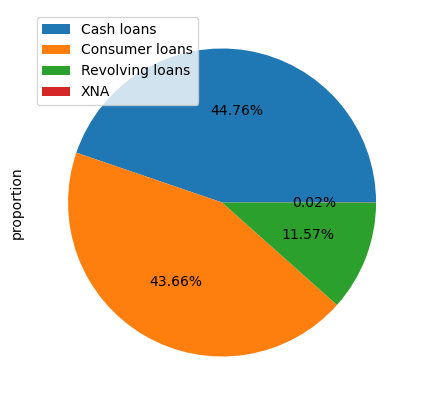

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: proportion, dtype: float64


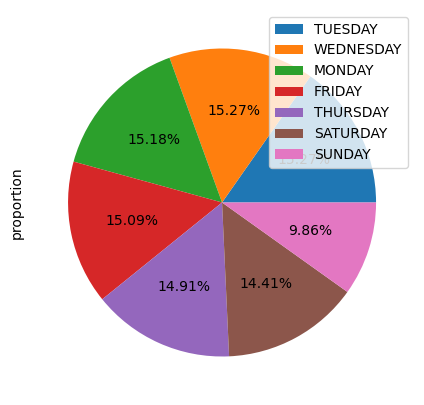

NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64


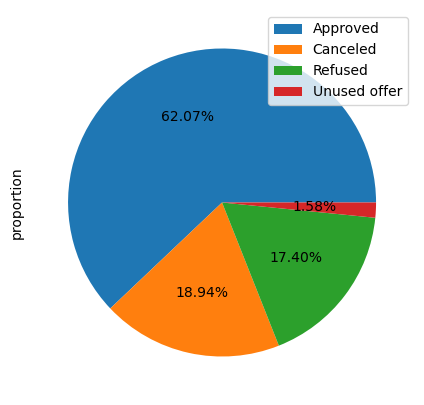

NAME_PAYMENT_TYPE
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: proportion, dtype: float64


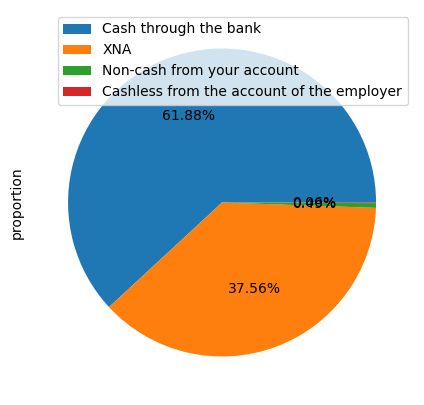

NAME_CLIENT_TYPE
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: proportion, dtype: float64


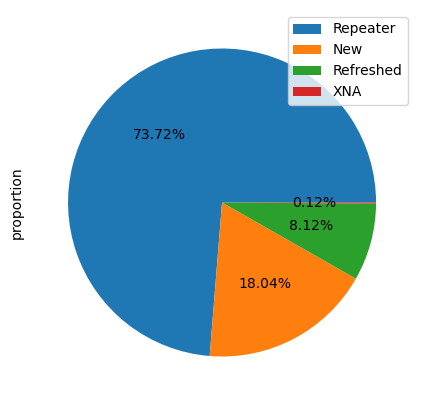

NAME_GOODS_CATEGORY
XNA                         5.692738e-01
Mobile                      1.345384e-01
Consumer Electronics        7.279067e-02
Computers                   6.332662e-02
Audio/Video                 5.953788e-02
Furniture                   3.212522e-02
Photo / Cinema Equipment    1.498072e-02
Construction Materials      1.496515e-02
Clothing and Accessories    1.410238e-02
Auto Accessories            4.419194e-03
Jewelry                     3.765984e-03
Homewares                   3.007399e-03
Medical Supplies            2.300903e-03
Vehicles                    2.017706e-03
Sport and Leisure           1.784801e-03
Gardening                   1.597400e-03
Other                       1.529145e-03
Office Appliances           1.396827e-03
Tourism                     9.932859e-04
Medicine                    9.280248e-04
Direct Sales                2.670316e-04
Fitness                     1.251337e-04
Additional Service          7.663689e-05
Education                   6.406365e

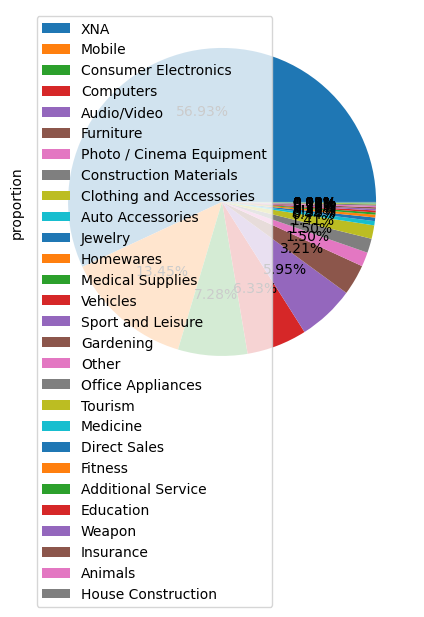

NAME_PORTFOLIO
POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: proportion, dtype: float64


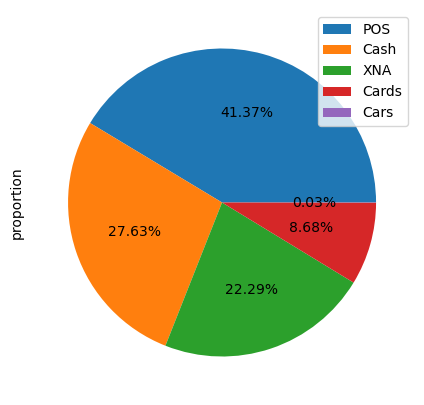

NAME_PRODUCT_TYPE
XNA        0.636844
x-sell     0.273191
walk-in    0.089965
Name: proportion, dtype: float64


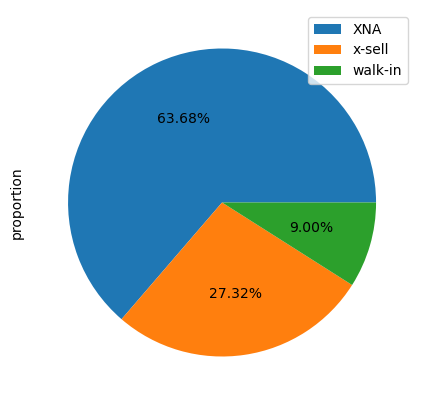

CHANNEL_TYPE
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: proportion, dtype: float64


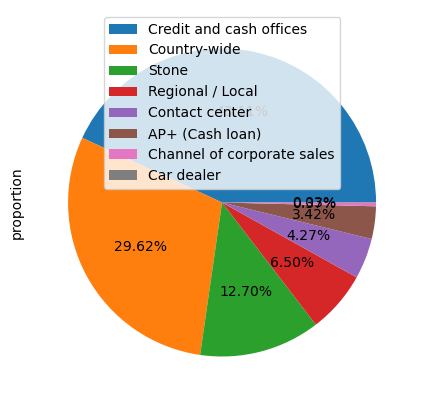

NAME_SELLER_INDUSTRY
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: proportion, dtype: float64


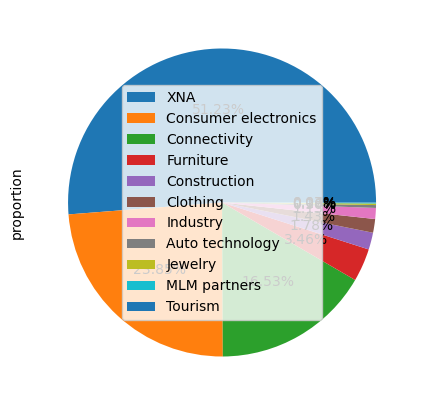

NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64


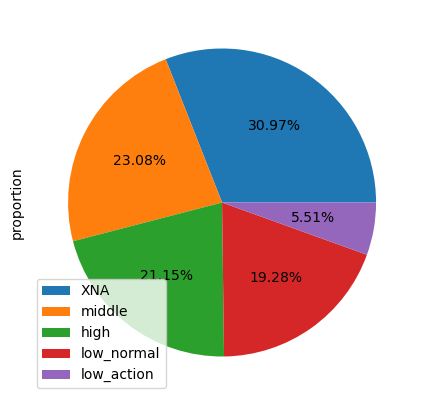

PRODUCT_COMBINATION
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: proportion, dtype: float64


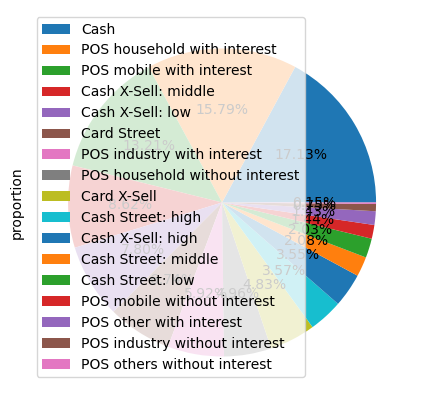

In [102]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct="%1.2f%%")
    plt.legend()
    plt.show()

##plot on numerical columns

99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


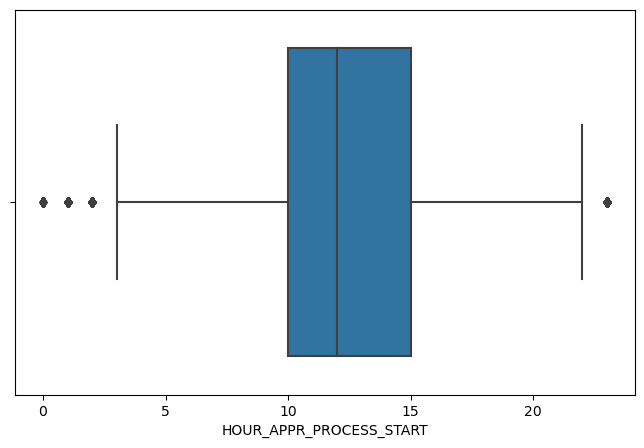

................
99th percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


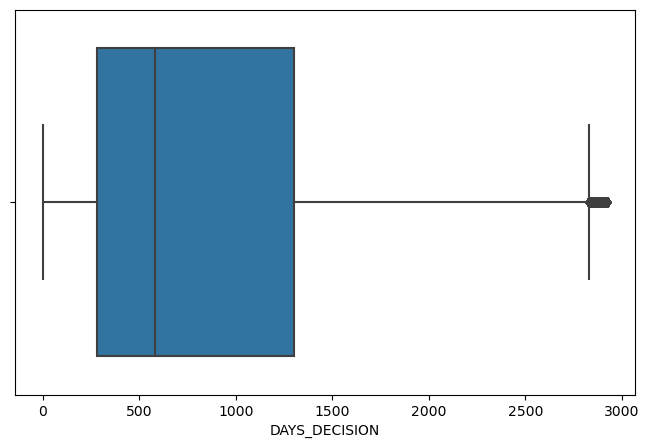

................
99th percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


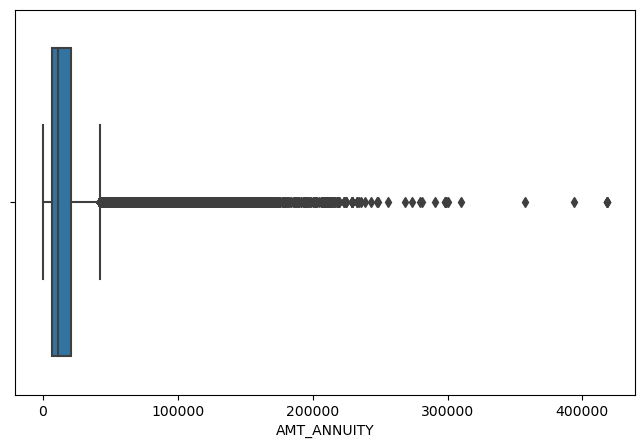

................
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


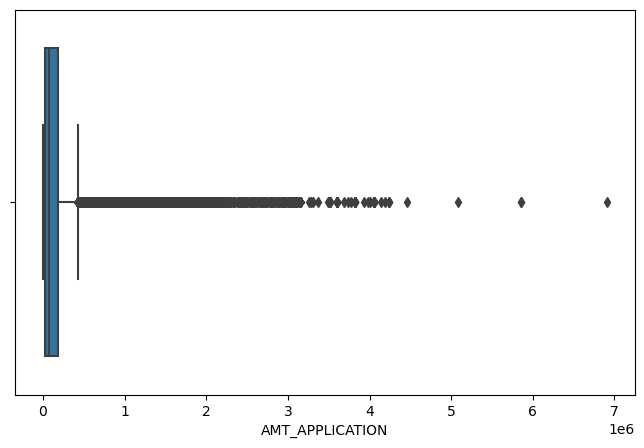

................
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


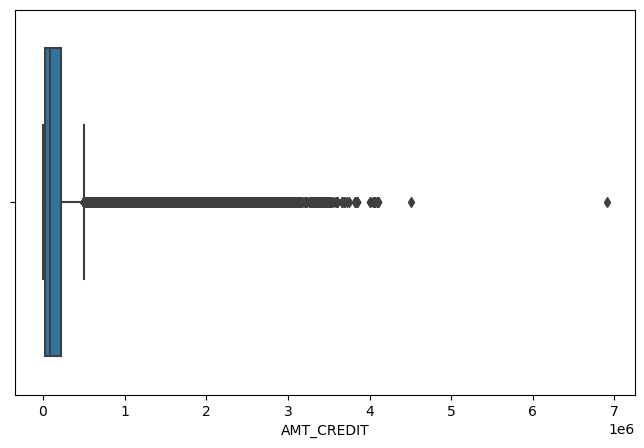

................
99th percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


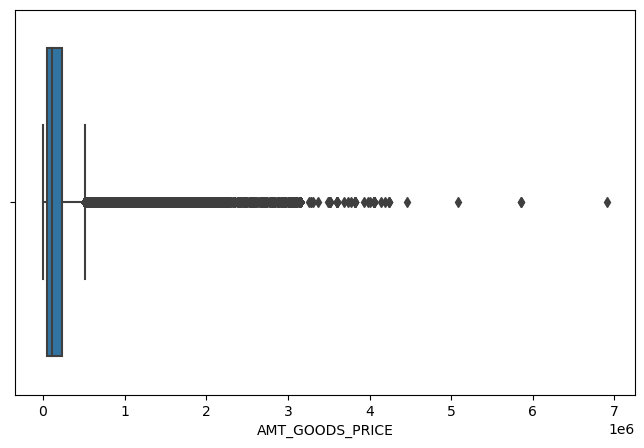

................
99th percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


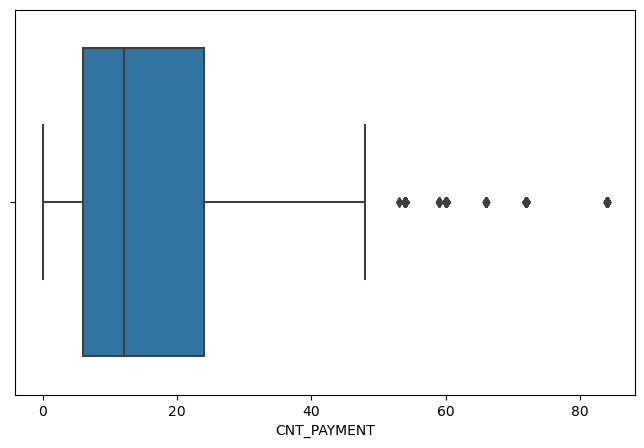

................
99th percentile nan
count    997149.000000
mean     342340.056543
std       88413.495220
min           2.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


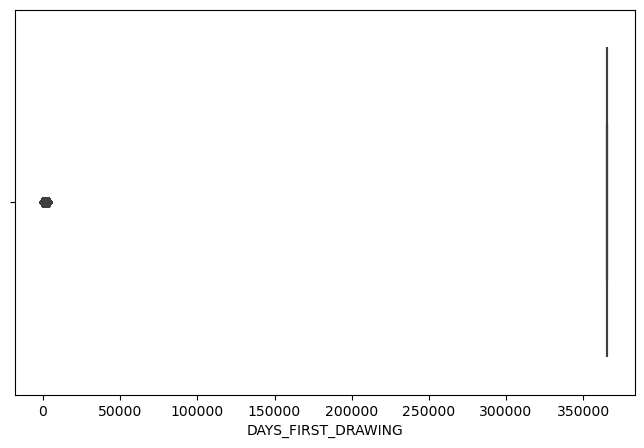

................
99th percentile nan
count    997149.000000
mean      15949.224065
std       72007.270877
min           2.000000
25%         475.000000
50%         921.000000
75%        1825.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


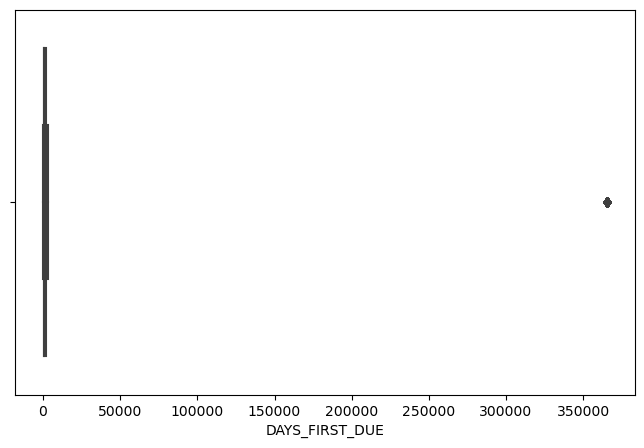

................
99th percentile nan
count    997149.000000
mean      35163.363265
std      106405.950190
min           0.000000
25%         257.000000
50%         741.000000
75%        1735.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


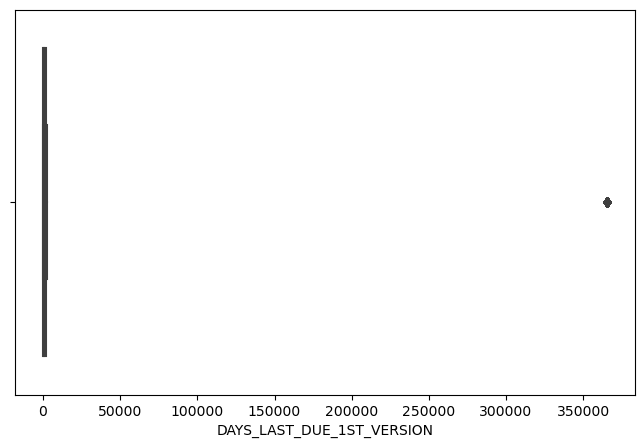

................
99th percentile nan
count    997149.000000
mean      78152.730207
std      148833.342466
min           2.000000
25%         455.000000
50%        1155.000000
75%        2418.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


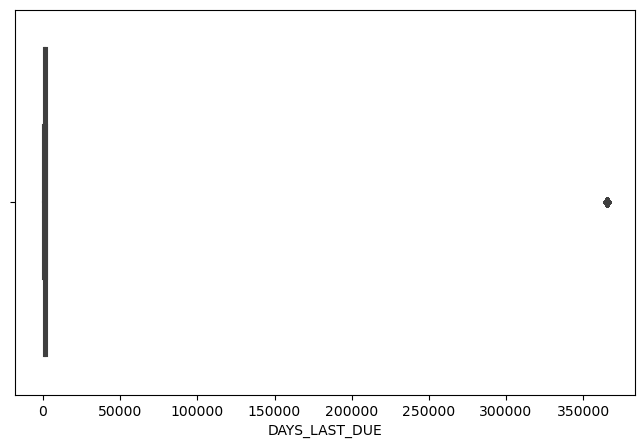

................
99th percentile nan
count    997149.000000
mean      83505.775017
std      152484.418802
min           2.000000
25%         447.000000
50%        1171.000000
75%        2501.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


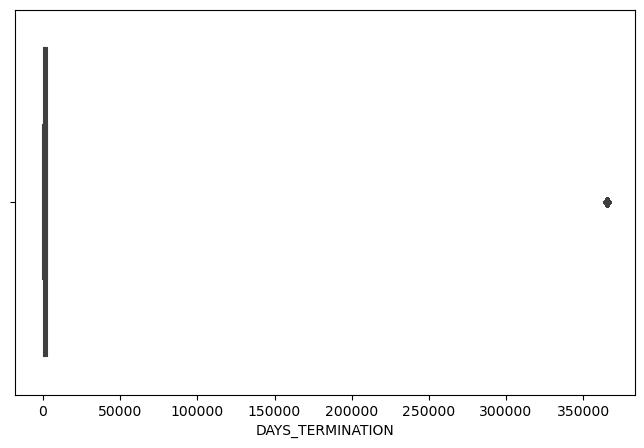

................
99th percentile nan
count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


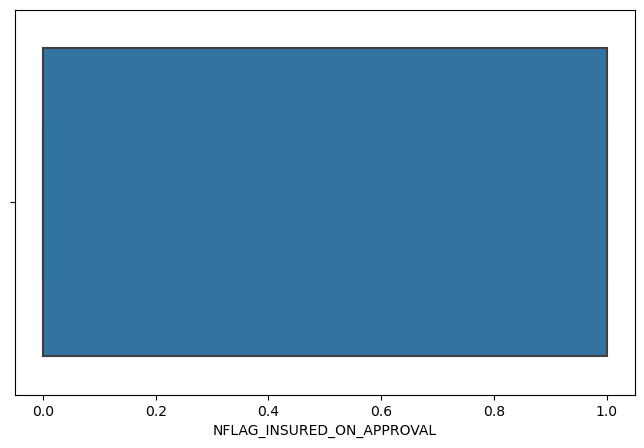

................


In [103]:
    for col in num_cols:
        print("99th percentile", np.percentile(papp_df[col], 99))
        print(papp_df[col].describe())
        plt.figure(figsize = [8,5])
        sns.boxplot(data=papp_df, x=col)
        plt.show()
        print("................")

# bivariate and multivariet annalysis

bivariate analysis between WEEKDAY_APPR_PROCESS_STARTS VS AMT_APPLICATION

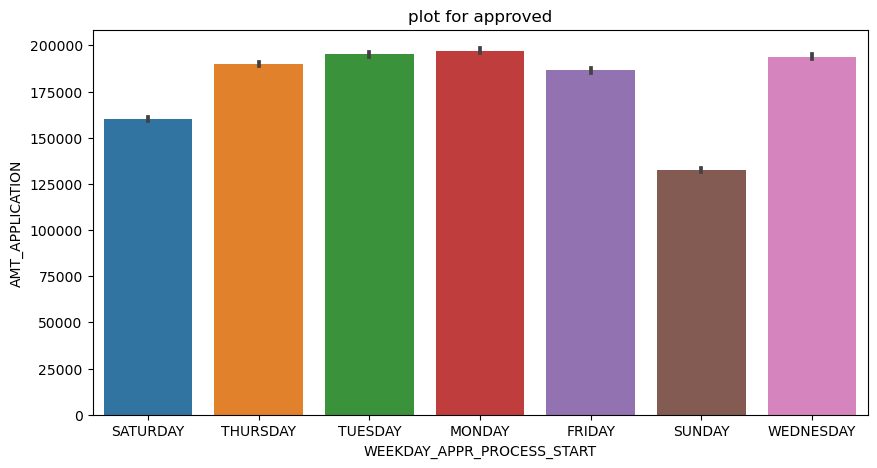

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION' , data= approved)
plt.title("plot for approved")
plt.show()

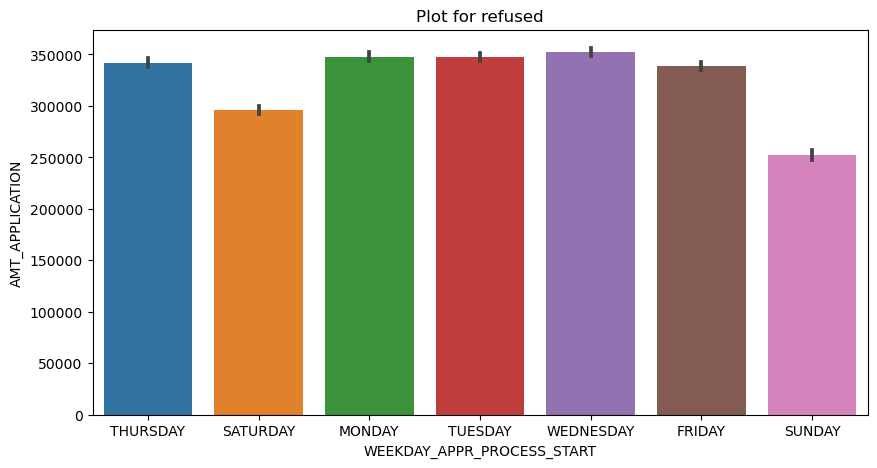

In [105]:

plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=refused)
plt.title("Plot for refused")
plt.show()



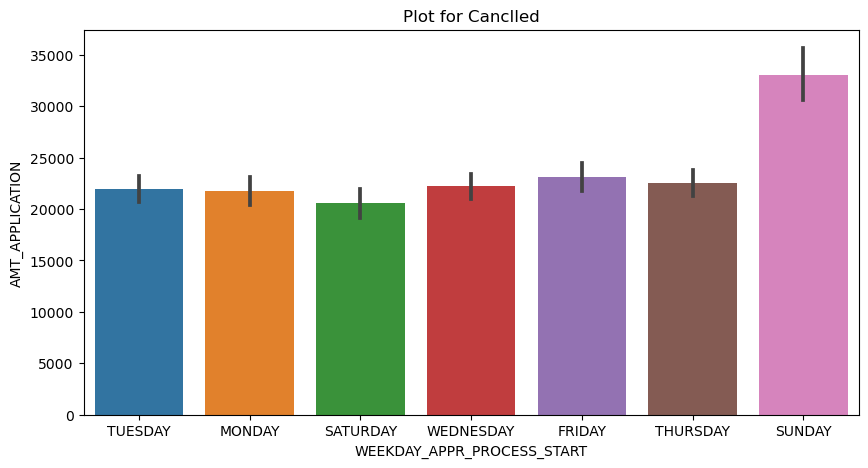

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=cancelled)
plt.title("Plot for Canclled")
plt.show()


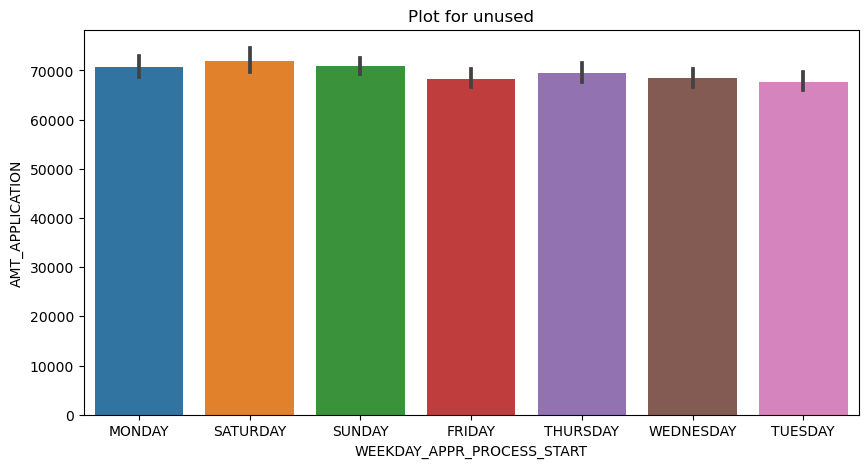

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=unused)
plt.title("Plot for unused")
plt.show()

## bivarient analysis between AMT_ANNUITY AND AMT_GOODS_PRICE

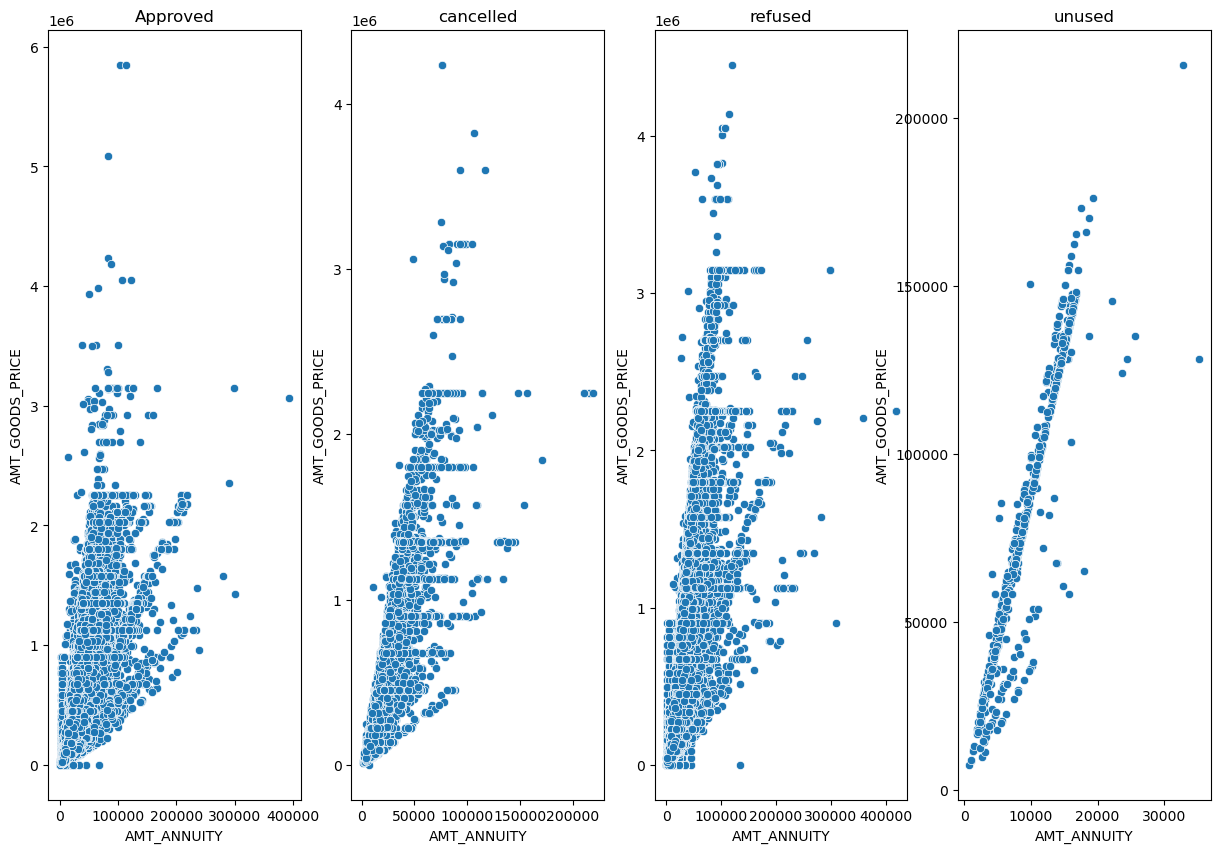

In [108]:
plt.figure(figsize=(15,10))

plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE' , data= approved)
plt.subplot(1,4,2)
plt.title("cancelled")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE' , data= cancelled)
plt.subplot(1,4,3)
plt.title("refused")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE' , data= refused)
plt.subplot(1,4,4)
plt.title("unused")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE' , data= unused)
plt.show()

conclusion
refused as no linear relation ship

#corelationship between numerical columns

In [109]:
corr_approved = approved[['DAYS_DECISION','SELLERPLACE_AREA','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_cancelled = cancelled[['DAYS_DECISION','SELLERPLACE_AREA','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_refused= refused[['DAYS_DECISION','SELLERPLACE_AREA','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_unused = unused[['DAYS_DECISION','SELLERPLACE_AREA','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']]

##corelation for numeric columns for approved

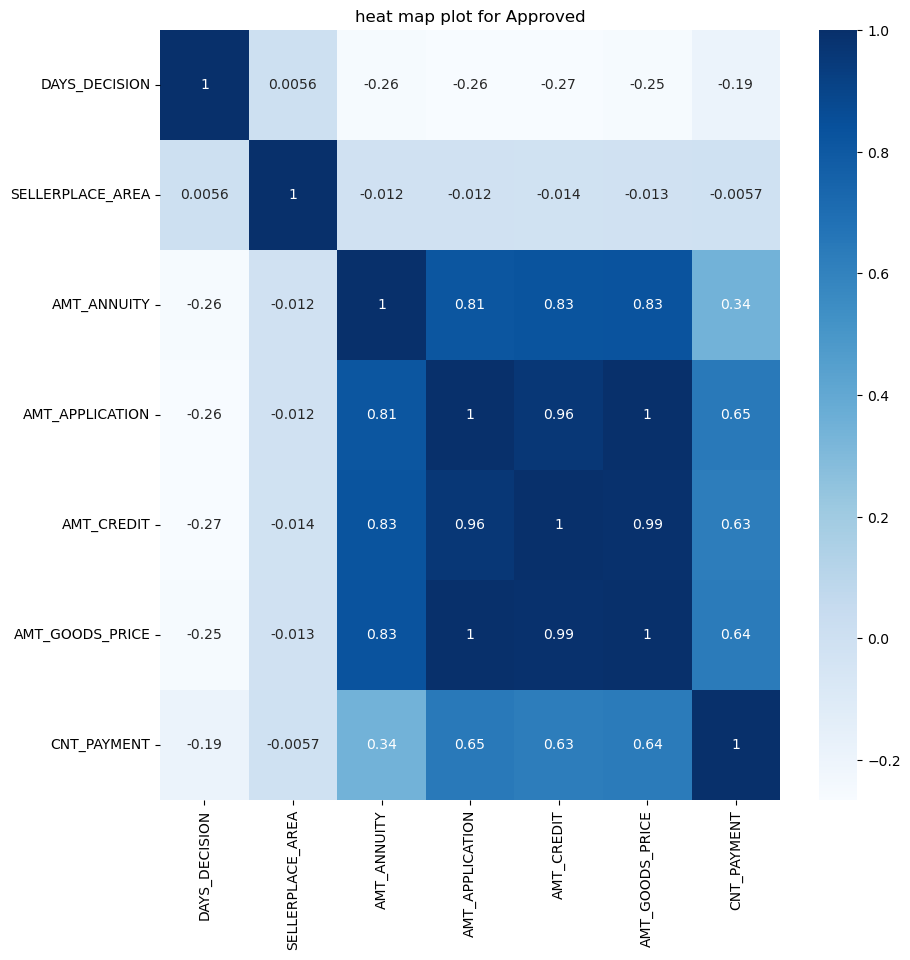

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("heat map plot for Approved")
plt.show()

##corelation for numeric columns for refused

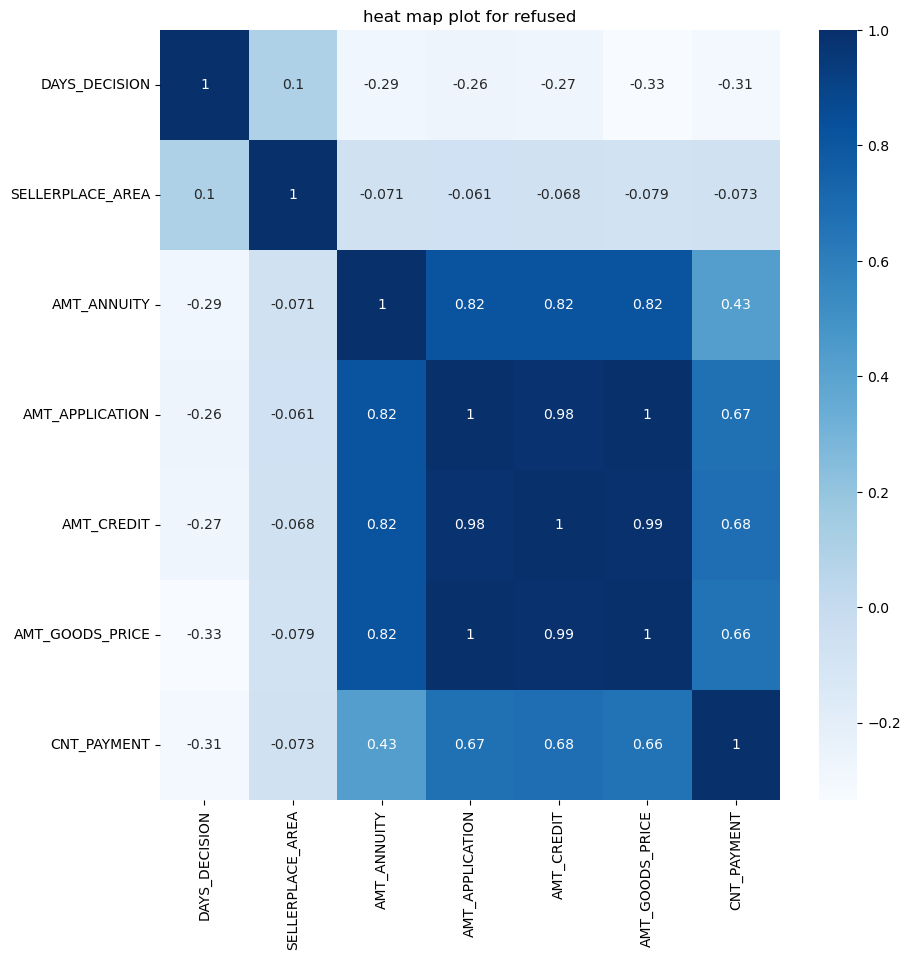

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_refused.corr(),annot=True,cmap="Blues")
plt.title("heat map plot for refused")
plt.show()

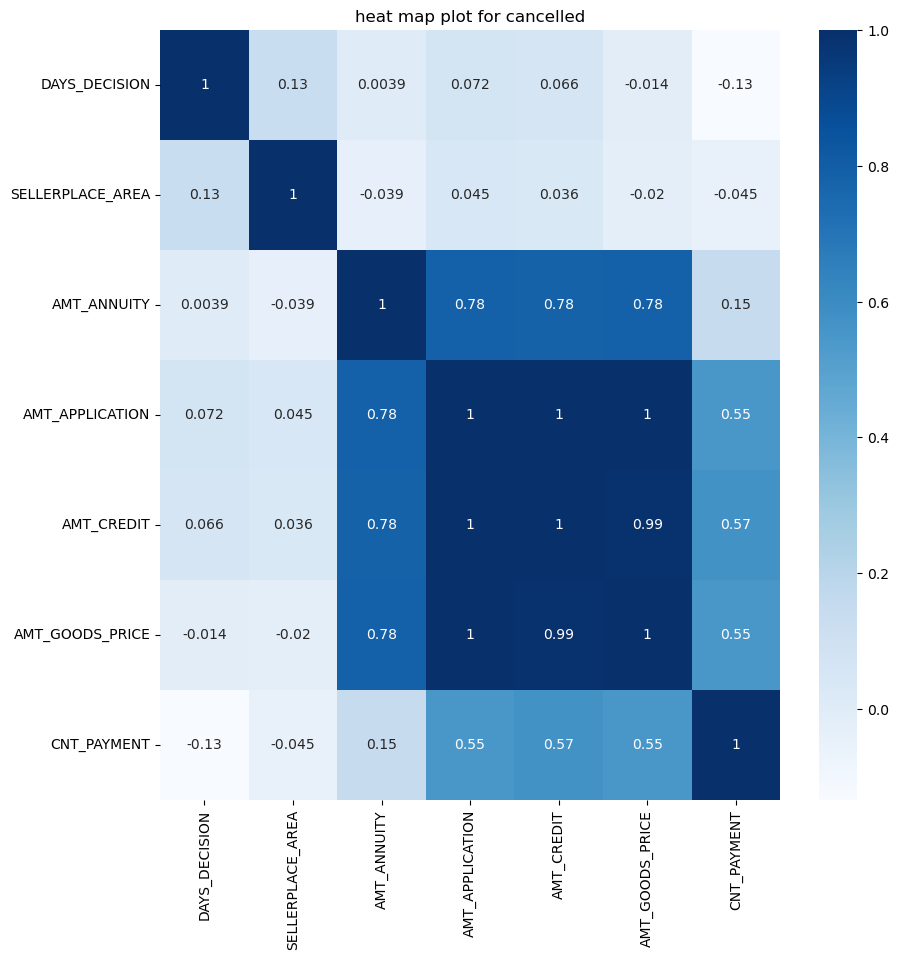

In [112]:
##corelation for numeric columns for refused
plt.figure(figsize=(10,10))
sns.heatmap(corr_cancelled.corr(),annot=True,cmap="Blues")
plt.title("heat map plot for cancelled")
plt.show()

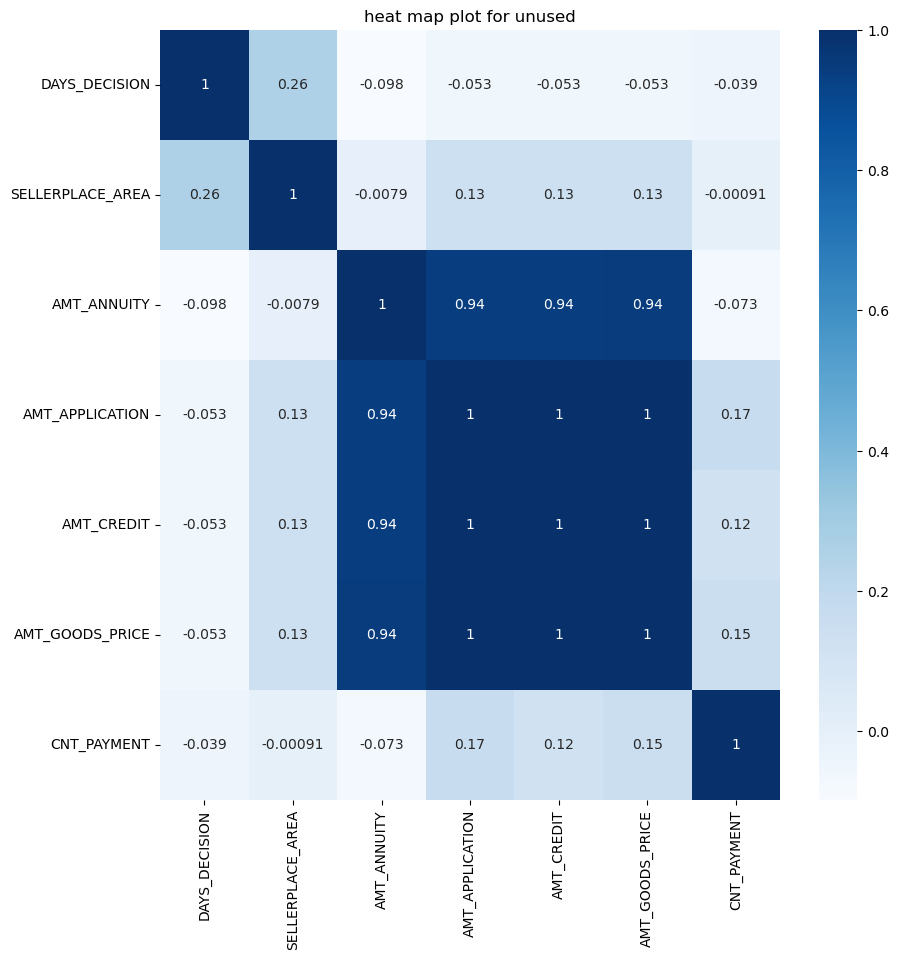

In [113]:
##corelation for numeric columns for refused
plt.figure(figsize=(10,10))
sns.heatmap(corr_unused.corr(),annot=True,cmap="Blues")
plt.title("heat map plot for unused")
plt.show()

#merge the application and previous application data frames

In [114]:
merge_df = app_df.merge(papp_df, on=["SK_ID_CURR"], how="left")
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.003541       16765           1188               1186   
4                    0.010032       19046            225               4260   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [115]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23527 entries, 0 to 23526
Columns: 114 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(33), int64(49), object(28)
memory usage: 19.8+ MB


### filtering required column for our analysis

In [116]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col, inplace=True)

In [117]:
merge_df.shape

(23527, 85)

In [118]:
res1= pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"], columns=["NAME_CONTRACT_STATUS"], values= ["TARGET"], aggfunc="mean")
res1

TARGET                      \
NAME_CONTRACT_STATUS                   Approved  Canceled   Refused   
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.066524  0.111111  0.040816   
                     Refreshed         0.067114  0.103896  0.181818   
                     Repeater          0.063112  0.089304  0.081272   
                     XNA                    NaN  0.000000  0.000000   
Pensioner            New               0.059805  0.000000  0.117647   
                     Refreshed         0.031873  0.061224  0.076923   
                     Repeater          0.062360  0.054898  0.081123   
                     XNA                    NaN  0.000000       NaN   
State servant        New               0.046414  0.000000  0.000000   
                     Refreshed         0.038462  0.000000  0.428571   
                     Repeater          0.023006  0.071111  0.127168   
                     XNA               0.000000       NaN       NaN   
Unemployed           New               0.000000       NaN       NaN   
                     Repeater          0.000000       NaN       NaN   
Working              New               0.101395  0.045455  0.187500   
                     Refreshed         0.071429  0.083969  0.125828   
                     Repeater          0.076634  0.114508  0.135327   
                     XNA               0.000000  0.000000  0.666667   

                                                    
NAME_CONTRACT_STATUS                  Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE               
Commercial associate New                  0.250000  
                     Refreshed            0.100000  
                     Repeater             0.057143  
                     XNA                       NaN  
Pensioner            New                  0.000000  
                     Refreshed            0.000000  
                     Repeater             0.054054  
                     XNA                       NaN  
State servant        New                  0.000000  
                     Refreshed            0.142857  
                     Repeater             0.000000  
                     XNA                       NaN  
Unemployed           New                       NaN  
                     Repeater                  NaN  
Working              New                  0.055556  
                     Refreshed            0.088889  
                     Repeater             0.110000  
                     XNA                  0.000000

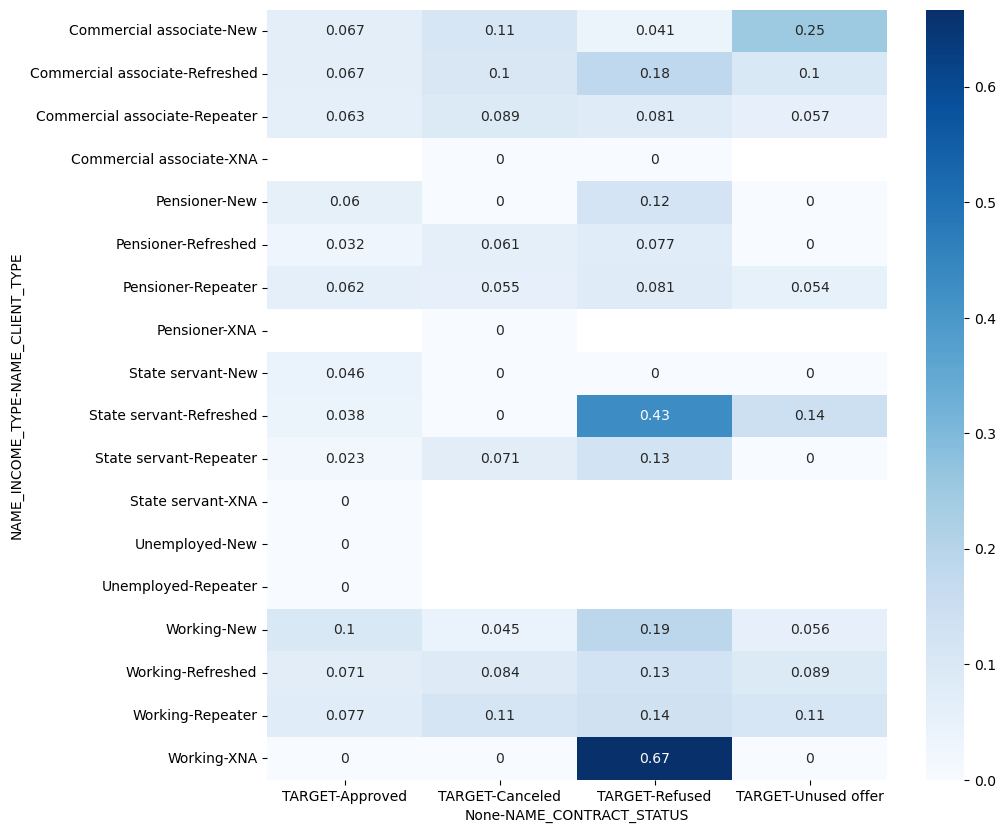

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(res1,annot=True,cmap="Blues")
plt.show()

In [120]:
res2= pd.pivot_table(data=merge_df, index=["CODE_GENDER","NAME_SELLER_INDUSTRY"], columns=["TARGET"], values= ["AMT_GOODS_PRICE_x"], aggfunc="sum")
res2

AMT_GOODS_PRICE_x             
TARGET                                           0            1
CODE_GENDER NAME_SELLER_INDUSTRY                               
F           Auto technology           5.706000e+06    1255500.0
            Clothing                  1.587600e+08    6507000.0
            Connectivity              1.144011e+09   80352000.0
            Construction              1.286138e+08    8293500.0
            Consumer electronics      1.807764e+09  100138500.0
            Furniture                 3.041280e+08   16222500.0
            Industry                  1.059165e+08    3685500.0
            Jewelry                   8.748000e+06     225000.0
            MLM partners              4.114980e+06          NaN
            Tourism                   3.811500e+06          NaN
            XNA                       4.018638e+09  333234000.0
M           Auto technology           2.180250e+07    2178000.0
            Clothing                  2.785500e+07    2236500.0
            Connectivity              6.463390e+08   66186000.0
            Construction              7.711650e+07    5697000.0
            Consumer electronics      9.828013e+08   85374000.0
            Furniture                 1.026315e+08    4189500.0
            Industry                  4.228650e+07    2466000.0
            Jewelry                   3.330000e+06          NaN
            XNA                       1.754183e+09  198810000.0

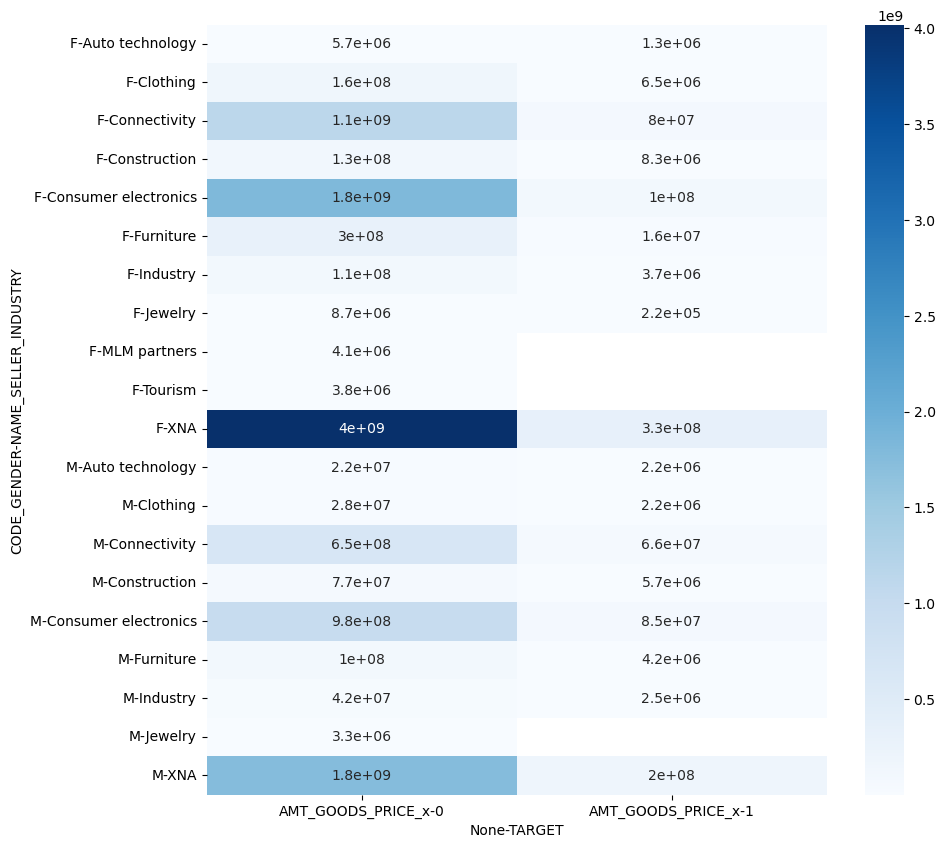

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(res2,annot=True,cmap="Blues")
plt.show()